In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
# Assuming train_data is your DataFrame
train_data = train_data.drop('id', axis=1)


In [7]:
train_data

Gender        Age    Height      Weight family_history_with_overweight  \
0        Male  24.443011  1.699998   81.669950                            yes   
1      Female  18.000000  1.560000   57.000000                            yes   
2      Female  18.000000  1.711460   50.165754                            yes   
3      Female  20.952737  1.710730  131.274851                            yes   
4        Male  31.641081  1.914186   93.798055                            yes   
...       ...        ...       ...         ...                            ...   
20753    Male  25.137087  1.766626  114.187096                            yes   
20754    Male  18.000000  1.710000   50.000000                             no   
20755    Male  20.101026  1.819557  105.580491                            yes   
20756    Male  33.852953  1.700000   83.520113                            yes   
20757    Male  26.680376  1.816547  118.134898                            yes   

      FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0      yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1      yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2      yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3      yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4      yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   
...    ...       ...       ...         ...   ...       ...  ..       ...   
20753  yes  2.919584  3.000000   Sometimes    no  2.151809  no  1.330519   
20754  yes  3.000000  4.000000  Frequently    no  1.000000  no  2.000000   
20755  yes  2.407817  3.000000   Sometimes    no  2.000000  no  1.158040   
20756  yes  2.671238  1.971472   Sometimes    no  2.144838  no  0.000000   
20757  yes  3.000000  3.000000   Sometimes    no  2.003563  no  0.684487   

            TUE       CALC                 MTRANS           NObeyesdad  
0      0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1      1.000000         no             Automobile        Normal_Weight  
2      1.673584         no  Public_Transportation  Insufficient_Weight  
3      0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4      0.931721  Sometimes  Public_Transportation  Overweight_Level_II  
...         ...        ...                    ...                  ...  
20753  0.196680  Sometimes  Public_Transportation      Obesity_Type_II  
20754  1.000000  Sometimes  Public_Transportation  Insufficient_Weight  
20755  1.198439         no  Public_Transportation      Obesity_Type_II  
20756  0.973834         no             Automobile  Overweight_Level_II  
20757  0.713823  Sometimes  Public_Transportation      Obesity_Type_II  

[20758 rows x 17 columns]

In [8]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [9]:
# Assuming train_data is your DataFrame
test_data1 = test_data.drop('id', axis=1)

In [10]:
test_data1.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  26.899886  1.848294  120.644178                            yes   
1  Female  21.000000  1.600000   66.000000                            yes   
2  Female  26.000000  1.643355  111.600553                            yes   
3    Male  20.979254  1.553127  103.669116                            yes   
4  Female  26.000000  1.627396  104.835346                            yes   

  FAVC      FCVC       NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
0  yes  2.938616  3.000000  Sometimes    no  2.825629  no  0.855400  0.000000   
1  yes  2.000000  1.000000  Sometimes    no  3.000000  no  1.000000  0.000000   
2  yes  3.000000  3.000000  Sometimes    no  2.621877  no  0.000000  0.250502   
3  yes  2.000000  2.977909  Sometimes    no  2.786417  no  0.094851  0.000000   
4  yes  3.000000  3.000000  Sometimes    no  2.653531  no  0.000000  0.741069   

        CALC                 MTRANS  
0  Sometimes  Public_Transportation  
1  Sometimes  Public_Transportation  
2  Sometimes  Public_Transportation  
3  Sometimes  Public_Transportation  
4  Sometimes  Public_Transportation

In [11]:
train_data.describe()

Age        Height        Weight          FCVC           NCP  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean      23.841804      1.700245     87.887768      2.445908      2.761332   
std        5.688072      0.087312     26.379443      0.533218      0.705375   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.064875      2.393837      3.000000   
75%       26.000000      1.762887    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  
mean       2.029418      0.981747      0.616756  
std        0.608467      0.838302      0.602113  
min        1.000000      0.000000      0.000000  
25%        1.792022      0.008013      0.000000  
50%        2.000000      1.000000      0.573887  
75%        2.549617      1.587406      1.000000  
max        3.000000      3.000000      2.000000

In [12]:
test_data.describe()

id           Age        Height        Weight          FCVC  \
count  13840.000000  13840.000000  13840.000000  13840.000000  13840.000000   
mean   27677.500000     23.952740      1.698934     87.384504      2.442898   
std     3995.408198      5.799814      0.088761     26.111819      0.531606   
min    20758.000000     14.000000      1.450000     39.000000      1.000000   
25%    24217.750000     20.000000      1.631662     65.000000      2.000000   
50%    27677.500000     22.906342      1.700000     83.952968      2.358087   
75%    31137.250000     26.000000      1.760710    111.157811      3.000000   
max    34597.000000     61.000000      1.980000    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  13840.000000  13840.000000  13840.000000  13840.000000  
mean       2.750610      2.032044      0.974532      0.611033  
std        0.710927      0.611230      0.840361      0.608005  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.771781      0.001086      0.000000  
50%        3.000000      2.000000      1.000000      0.552498  
75%        3.000000      2.552388      1.571865      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [13]:
train_data.shape

(20758, 17)

In [14]:
test_data.shape

(13840, 17)

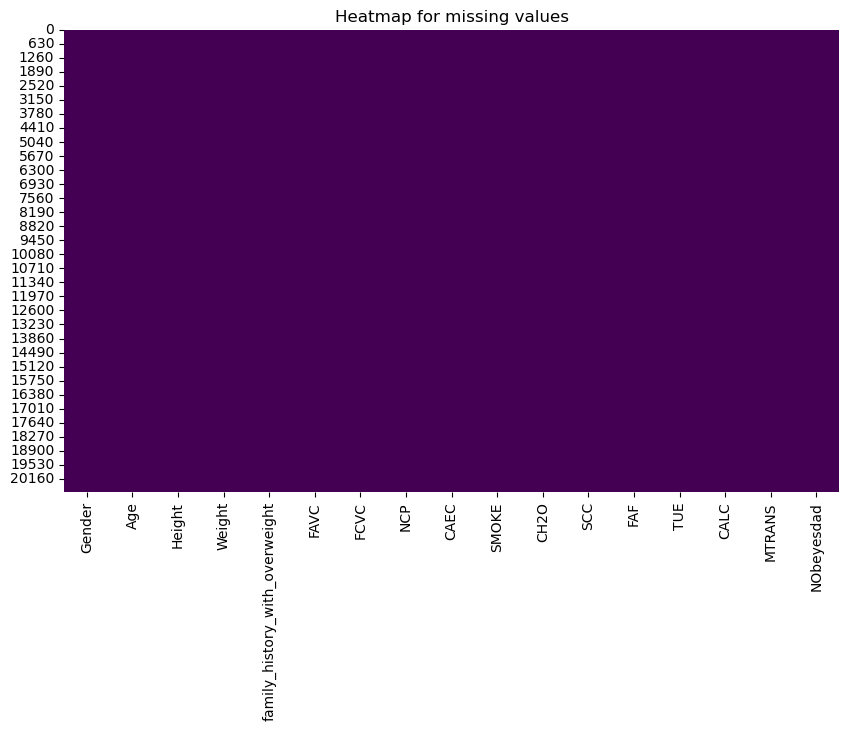

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap for missing values')
plt.show()

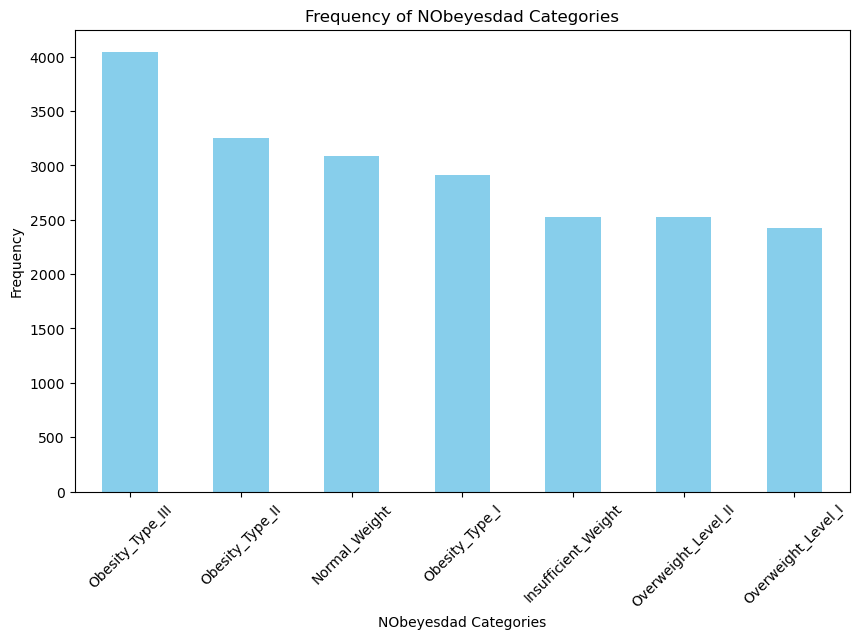

Frequency:
 Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

Relative Frequency:
 Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: NObeyesdad, dtype: float64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'train_data'
# Replace 'train_data' with the actual name of your DataFrame

# Frequency of each category in the 'NObeyesdad' column
frequency = train_data['NObeyesdad'].value_counts()

# Relative frequency of each category
relative_frequency = train_data['NObeyesdad'].value_counts(normalize=True)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of NObeyesdad Categories')
plt.xlabel('NObeyesdad Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Displaying the frequencies and relative frequencies
print("Frequency:\n", frequency)
print("\nRelative Frequency:\n", relative_frequency)


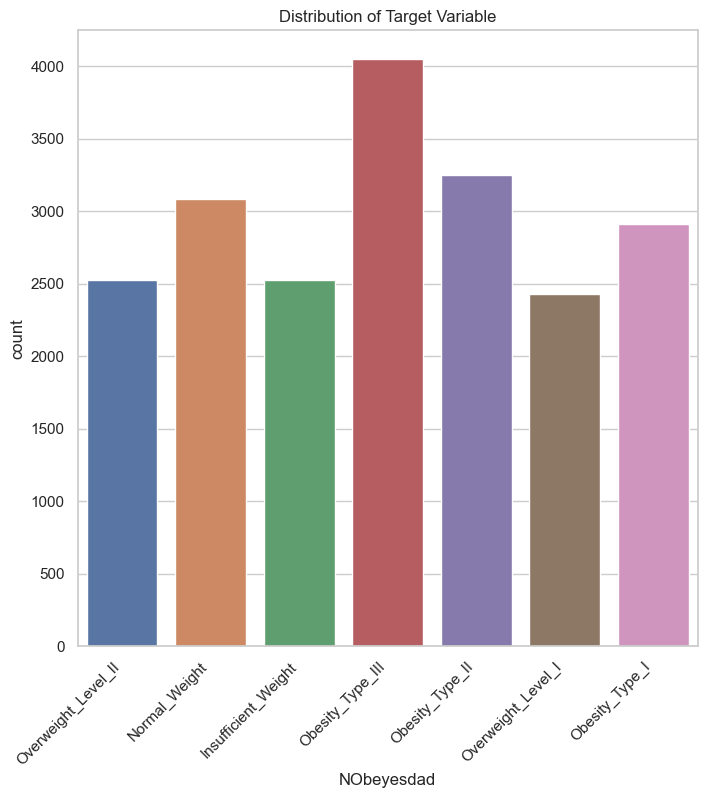

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot 1: Countplot of the Target Variable with Rotated X-axis Labels
plt.figure(figsize=(8, 8))
countplot = sns.countplot(x='NObeyesdad', data=train_data)
plt.title('Distribution of Target Variable')

# Rotate x-axis labels
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()



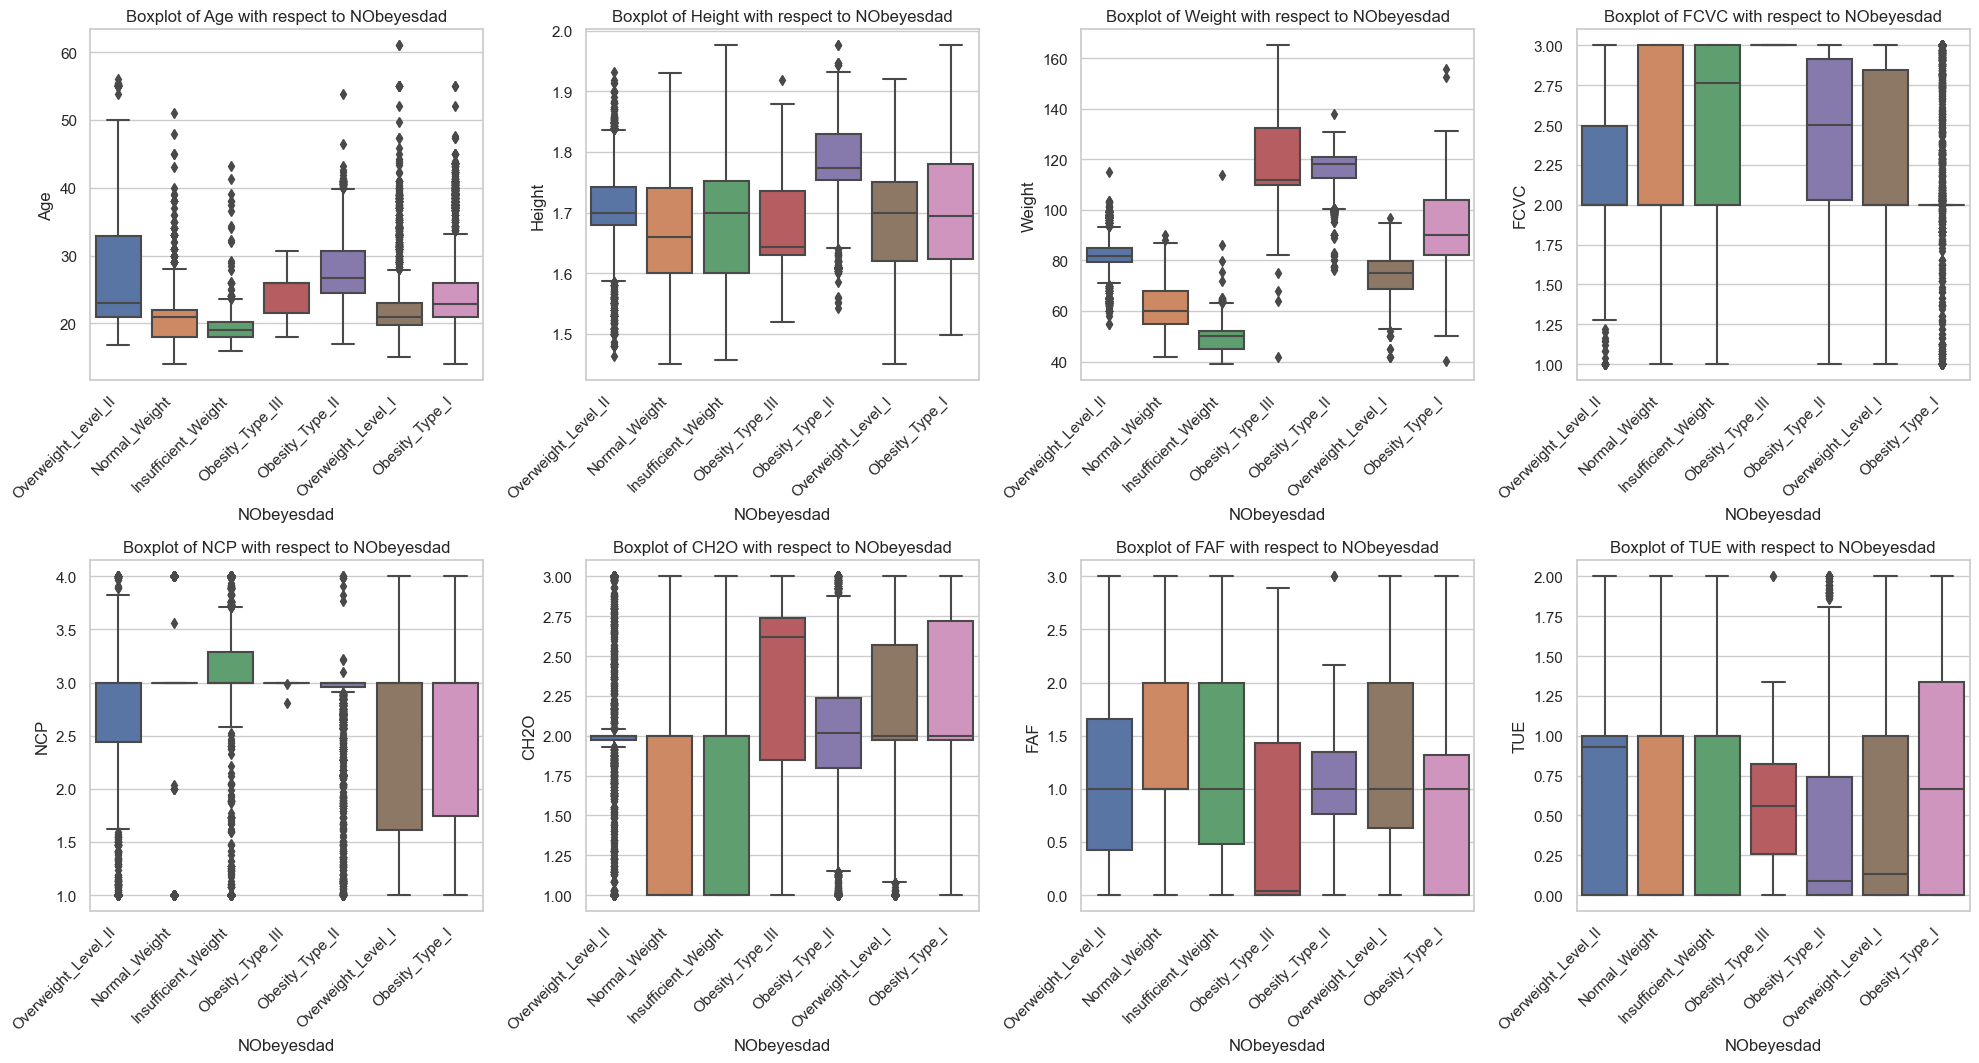

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot 2: Boxplot of Numerical Features with respect to Target Variable
numerical_features = train_data.select_dtypes(include=['float64'])
numerical_cols = numerical_features.columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4,4, i)
    boxplot = sns.boxplot(x='NObeyesdad', y=col, data=train_data)
    plt.title(f'Boxplot of {col} with respect to NObeyesdad')
    
    # Rotate x-axis labels
    boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

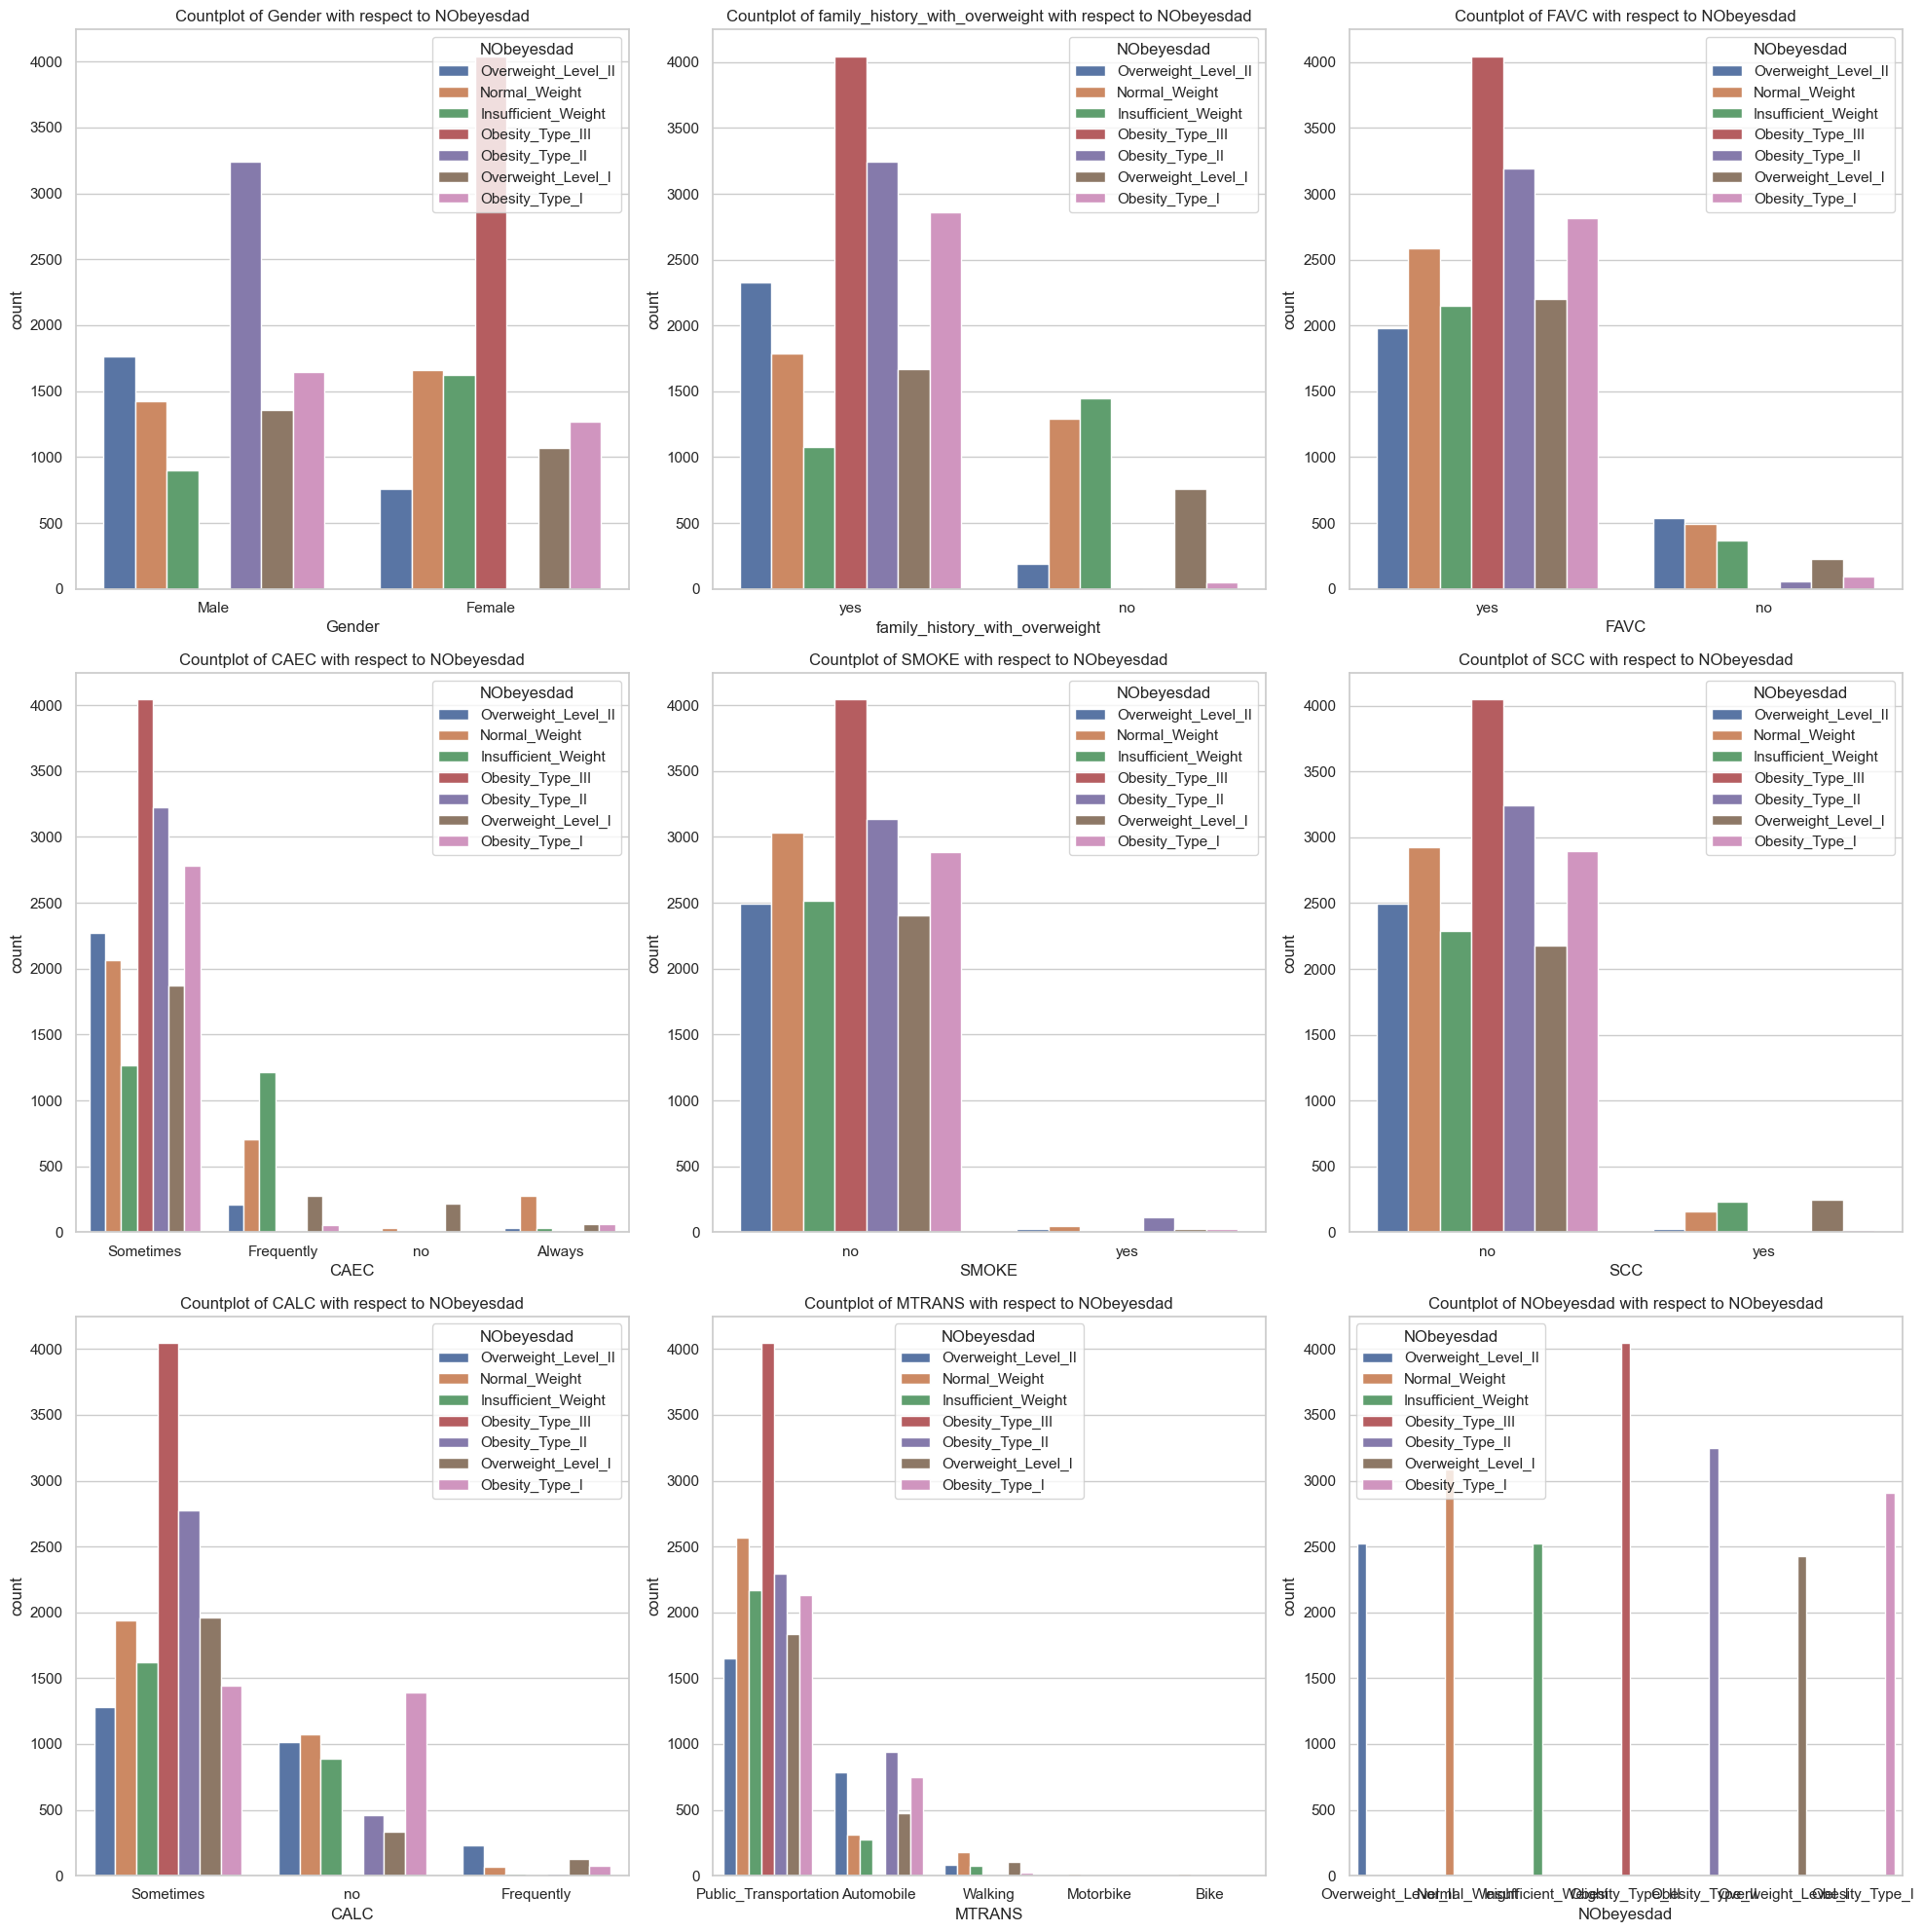

In [19]:
# Plot 3: Countplot of Categorical Features with respect to Target Variable
categorical_features = train_data.select_dtypes(include=['object'])
categorical_cols = categorical_features.columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='NObeyesdad', data=train_data)
    plt.title(f'Countplot of {col} with respect to NObeyesdad')
    # Rotate x-axis labels
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.tight_layout()
plt.show()



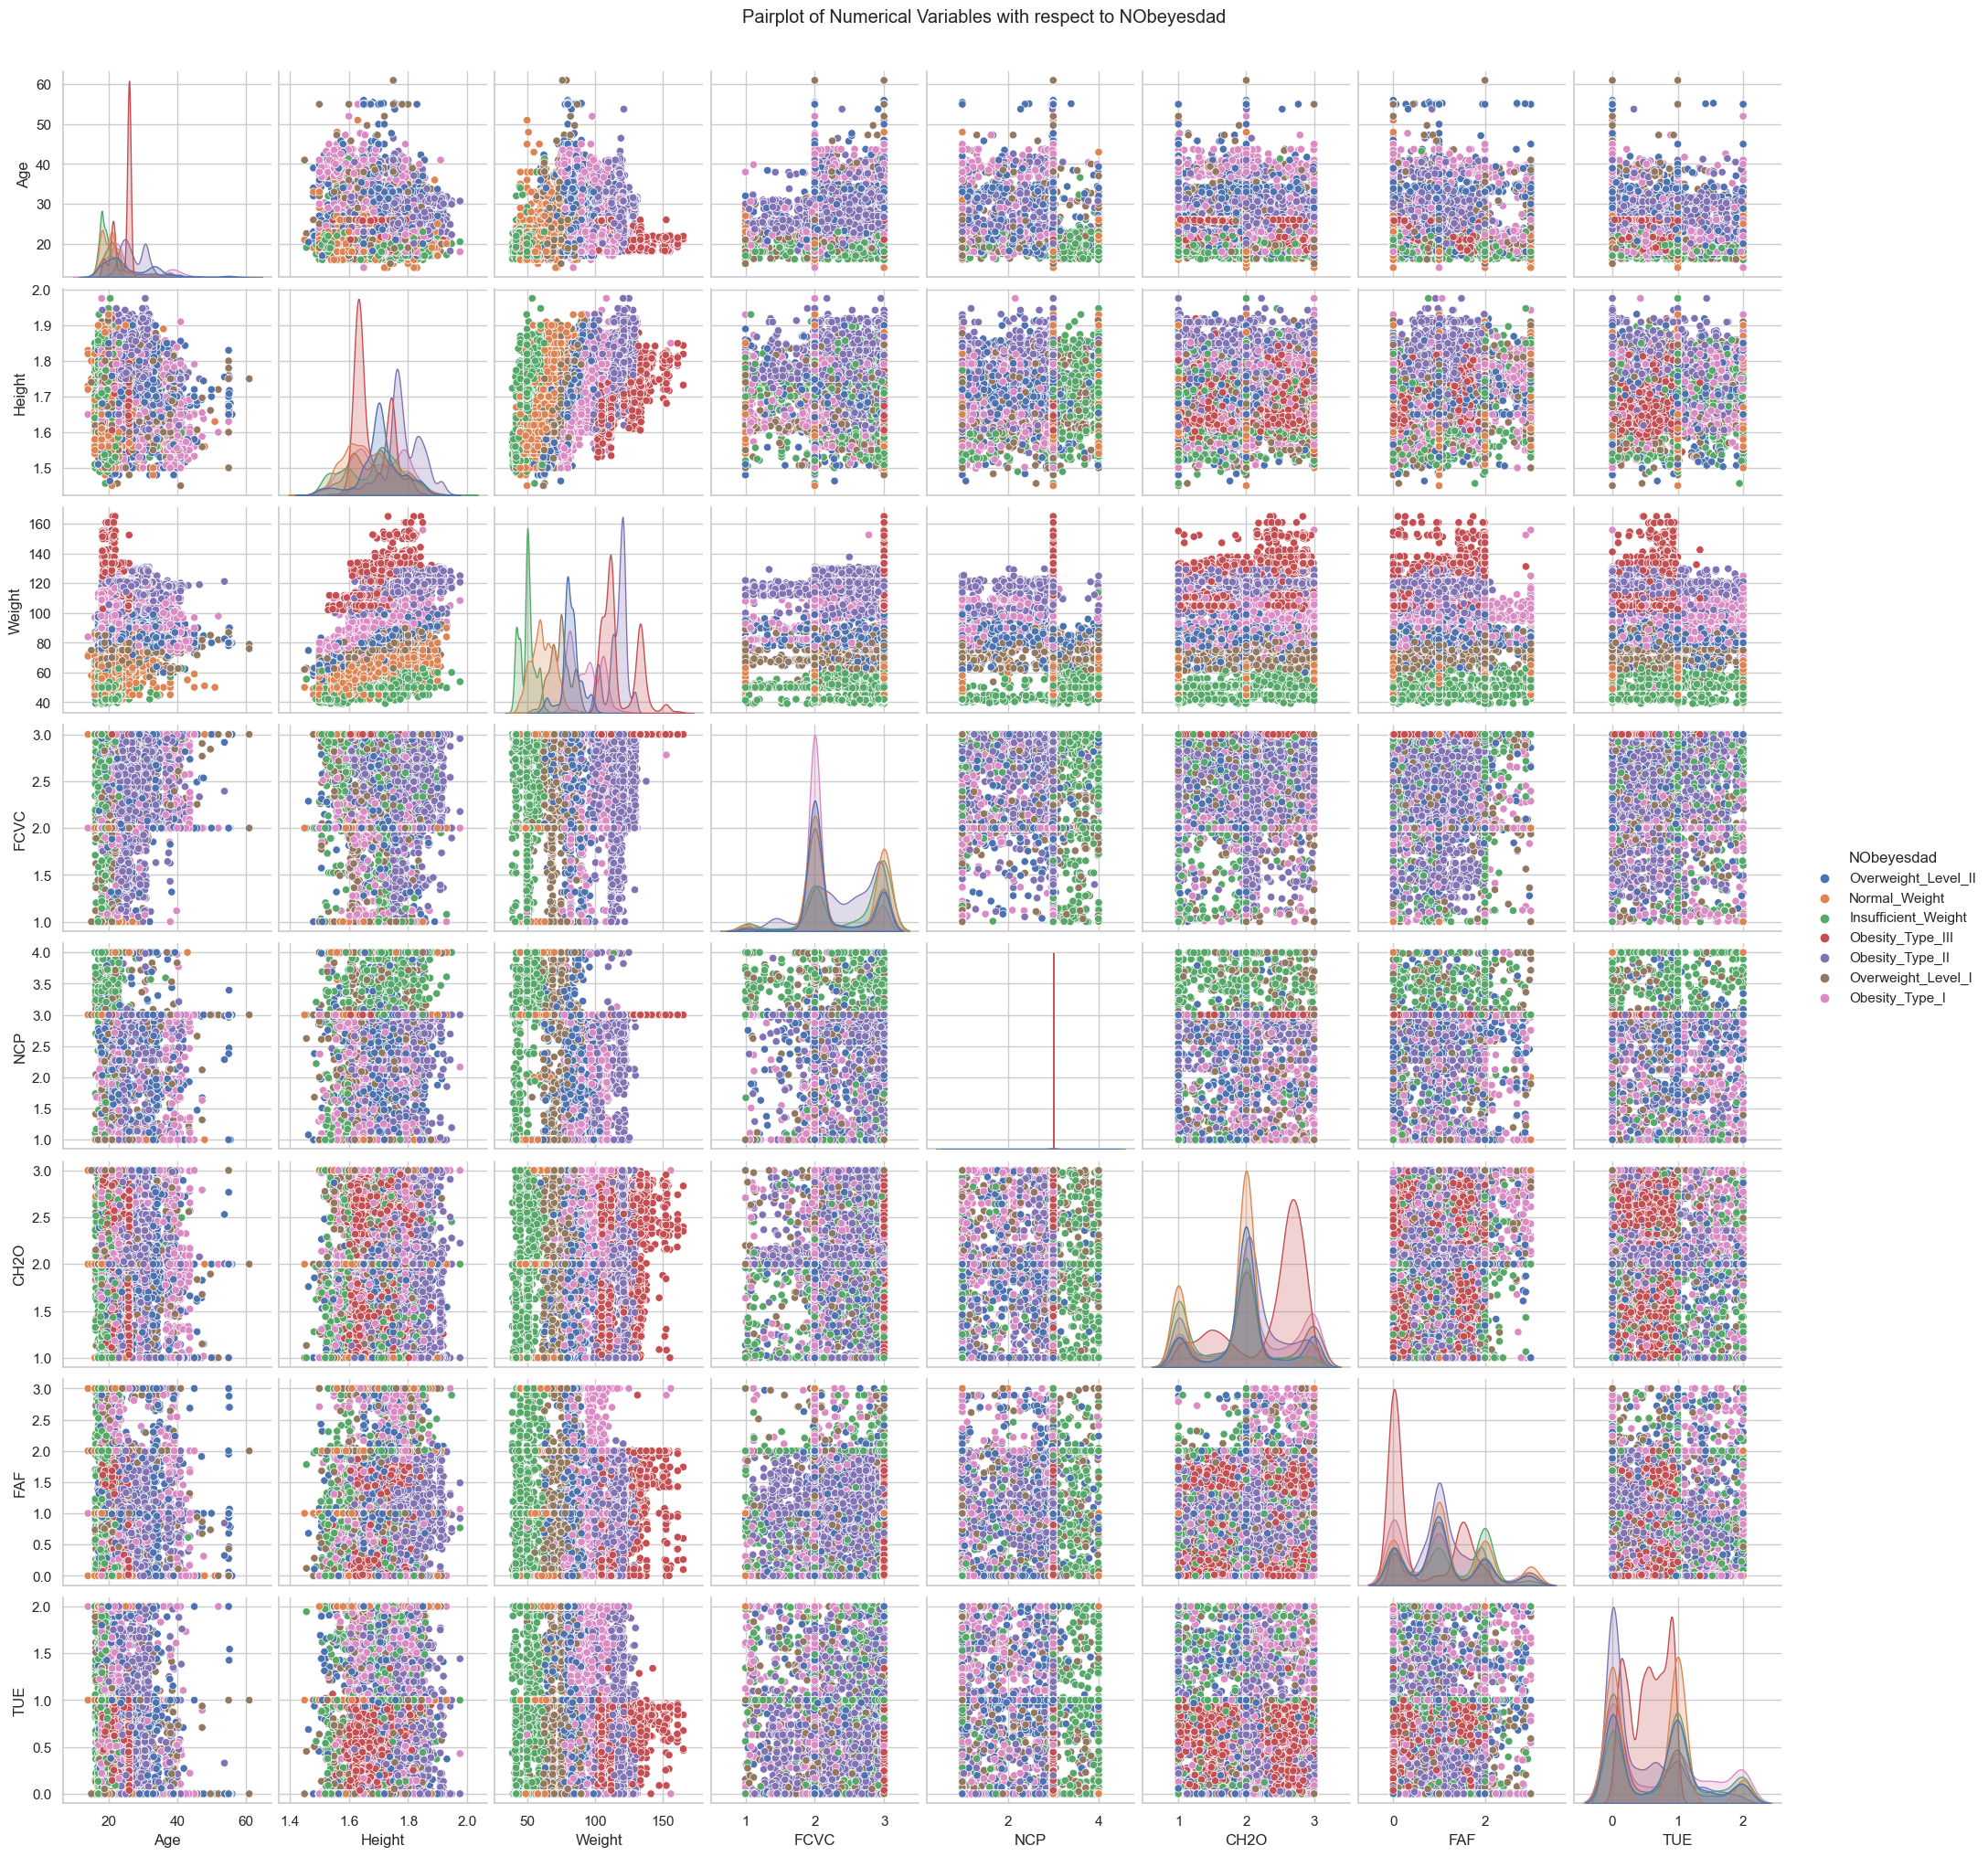

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset the index to ensure unique labels
train_data_reset = train_data.reset_index(drop=True)

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot 5: Pairplot of Numerical Variables
sns.pairplot(train_data_reset, hue='NObeyesdad', vars=numerical_cols)
plt.suptitle('Pairplot of Numerical Variables with respect to NObeyesdad', y=1.02)
plt.show()


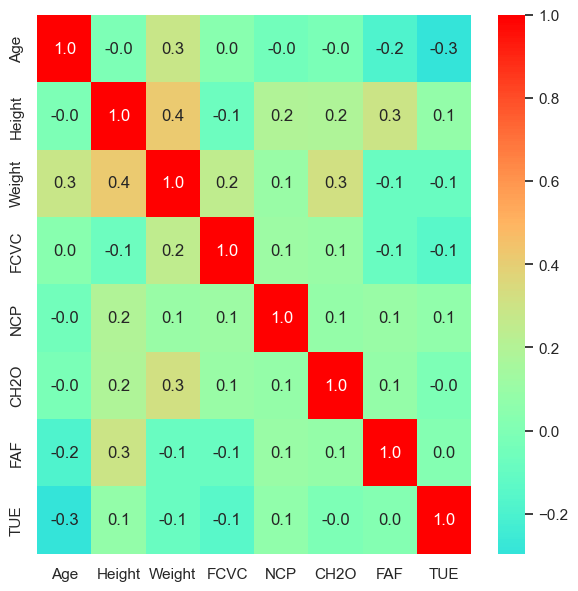

In [21]:
corr = train_data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="rainbow", center=0, ax=ax)

plt.show()

In [22]:
train_data.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [23]:
train_data1 = train_data.drop('NObeyesdad', axis=1)

In [24]:
train_data1.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS  
0  0.976473  Sometimes  Public_Transportation  
1  1.000000         no             Automobile  
2  1.673584         no  Public_Transportation  
3  0.780199  Sometimes  Public_Transportation  
4  0.931721  Sometimes  Public_Transportation

In [25]:
train_data1 = pd.get_dummies(train_data1, prefix_sep='_', drop_first=True)
train_data1.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [26]:
train_data1.head()

Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
0  24.443011  1.699998   81.669950  2.000000  2.983297  2.763573  0.000000   
1  18.000000  1.560000   57.000000  2.000000  3.000000  2.000000  1.000000   
2  18.000000  1.711460   50.165754  1.880534  1.411685  1.910378  0.866045   
3  20.952737  1.710730  131.274851  3.000000  3.000000  1.674061  1.467863   
4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848  1.967973   

        TUE  Gender_Male  family_history_with_overweight_yes  ...  \
0  0.976473            1                                   1  ...   
1  1.000000            0                                   1  ...   
2  1.673584            0                                   1  ...   
3  0.780199            0                                   1  ...   
4  0.931721            1                                   1  ...   

   CAEC_Sometimes  CAEC_no  SMOKE_yes  SCC_yes  CALC_Sometimes  CALC_no  \
0               1        0          0        0               1        0   
1               0        0          0        0               0        1   
2               1        0          0        0               0        1   
3               1        0          0        0               1        0   
4               1        0          0        0               1        0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0            0                 0                             1               0  
1            0                 0                             0               0  
2            0                 0                             1               0  
3            0                 0                             1               0  
4            0                 0                             1               0  

[5 rows x 22 columns]

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'numerical_features' and 'categorical_features' are already defined
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes', 'CAEC_no',
                         'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                         'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']

# Extract numerical and categorical features from train_data1
X_train_numerical = train_data1[numerical_features]
X_train_categorical = train_data1[categorical_features]

# Scale the numerical features
scaler_numerical = StandardScaler()
X_train_scaled_numerical = scaler_numerical.fit_transform(X_train_numerical)

# Convert the scaled numerical features to a DataFrame
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features)

# Concatenate numerical and categorical features
train_final = pd.concat([X_train_scaled_numerical_df, X_train_categorical], axis=1)

# Display the processed data
train_final.head()


Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0  0.105699 -0.002828 -0.235713 -0.836279  0.314684  1.206594 -1.171141   
1 -1.027052 -1.606291 -1.170931 -0.836279  0.338364 -0.048349  0.021775   
2 -1.027052  0.128451 -1.430012 -1.060332 -1.913423 -0.195644 -0.138022   
3 -0.507929  0.120090  1.644770  1.039171  0.338364 -0.584035  0.579896   
4  1.371197  2.450367  0.224054  0.438397 -1.119801 -0.081469  1.176486   

        TUE  Gender_Male  family_history_with_overweight_yes  CAEC_Sometimes  \
0  0.597438            1                                   1               1   
1  0.636513            0                                   1               0   
2  1.755239            0                                   1               1   
3  0.271455            0                                   1               1   
4  0.523111            1                                   1               1   

   CAEC_no  SMOKE_yes  SCC_yes  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0        0          0        0               1        0            0   
1        0          0        0               0        1            0   
2        0          0        0               0        1            0   
3        0          0        0               1        0            0   
4        0          0        0               1        0            0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0                 0                             1               0  
1                 0                             0               0  
2                 0                             1               0  
3                 0                             1               0  
4                 0                             1               0

In [28]:
train_final.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes',
       'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [29]:
#Separate X and y variables
predictors =['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes',
       'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking']
outcome = ['NObeyesdad']
X = train_final[predictors]
y = train_data[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
logreg_preds = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, logreg_preds)
print("Logistic Regression Accuracy:", accuracy)

# Intercept and coefficients
intercept = logreg_model.intercept_
coefficients = logreg_model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

# AIC (Akaike Information Criterion)
# Note: statsmodels' Logit doesn't directly support multinomial logistic regression,
# so we use sm.MNLogit as an alternative for AIC calculation
logit_model = sm.MNLogit(y_train, sm.add_constant(X_train))
logit_result = logit_model.fit()
aic = logit_result.aic
print("AIC:", aic)



Logistic Regression Accuracy: 0.8846153846153846
Intercept: [-12.10903528   0.36471817   7.31573428  -4.74613609  -3.77424587
   6.09535674   6.85360805]
Coefficients: [[-8.64626184e-01  3.83764084e+00 -2.16406051e+01 -2.07746320e-01
   1.80279988e-01  1.02586760e-01  2.73502184e-01  1.91942114e-01
   1.31502040e+00 -1.17789420e+00 -1.35651333e+00 -1.43591003e+00
  -8.50338203e-01  3.10590759e-01  8.99228555e-01  1.35286387e+00
  -4.53966062e-01 -6.38361912e-01 -1.50960099e+00 -1.30024928e+00]
 [-4.18912082e-01  2.05396968e+00 -1.14228638e+01 -3.99522175e-01
   1.28379426e-01 -1.59160844e-02  2.65301846e-01 -6.41911214e-02
   1.17855592e+00 -9.67361726e-01 -6.89272656e-01 -4.71348483e-01
   2.92156305e-01  2.58962107e-01  1.60644704e-01  4.76801805e-01
   5.26651915e-01  1.12250903e+00 -5.64185129e-01  2.53977953e-01]
 [-1.90926347e-02 -1.64145184e+00  8.06998216e+00 -9.62707003e-01
  -3.53716204e-01  2.83193414e-01  2.53388859e-02  1.01043694e-01
  -1.31993266e+00  7.75470912e-01  3.1

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2300: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


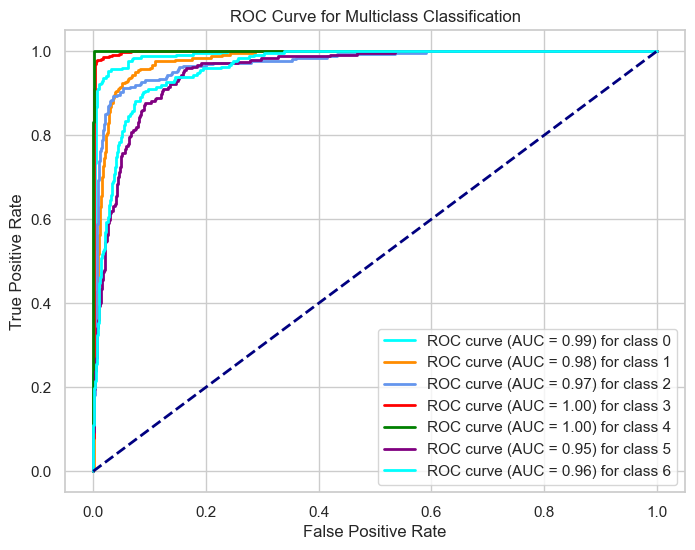

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming logreg_model is already trained and logreg_preds is obtained

# Binarize the output
y_bin = label_binarize(y_test, classes=np.unique(y_test))

n_classes = y_bin.shape[1]

# Define six different colors
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])

# ROC Curve for each class
plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_bin[:, i], logreg_model.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve (AUC = {:.2f}) for class {}'.format(roc_auc, i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


In [33]:
from sklearn.metrics import confusion_matrix

# Assuming logreg_model is already trained
# Make predictions on the test set
logreg_preds = logreg_model.predict(X_test)

# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, logreg_preds)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, logreg_preds)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[239  15   0   0   0   1   0]
 [ 39 254   0   0   0  34   3]
 [  0   0 222   8   3   7  20]
 [  0   0   7 329   0   0   1]
 [  0   0   0   0 404   0   0]
 [  1  22   6   0   0 170  45]
 [  0   4  26   1   0  40 175]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.94      0.90       255
      Normal_Weight       0.86      0.77      0.81       330
     Obesity_Type_I       0.85      0.85      0.85       260
    Obesity_Type_II       0.97      0.98      0.97       337
   Obesity_Type_III       0.99      1.00      1.00       404
 Overweight_Level_I       0.67      0.70      0.69       244
Overweight_Level_II       0.72      0.71      0.71       246

           accuracy                           0.86      2076
          macro avg       0.85      0.85      0.85      2076
       weighted avg       0.86      0.86      0.86      2076



In [34]:
import pandas as pd

# Flatten or convert to 1D array
y_test_flat = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()
logreg_preds_flat = logreg_preds.flatten() if isinstance(logreg_preds, pd.DataFrame) else logreg_preds.flatten()

# Create a DataFrame with actual and predicted values
predictions_df = pd.DataFrame({'Actual': y_test_flat, 'Predicted': logreg_preds_flat})

# Display the first few rows of the DataFrame
print(predictions_df.head())


                Actual            Predicted
0     Obesity_Type_III     Obesity_Type_III
1   Overweight_Level_I   Overweight_Level_I
2       Obesity_Type_I       Obesity_Type_I
3      Obesity_Type_II      Obesity_Type_II
4  Insufficient_Weight  Insufficient_Weight


In [35]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", accuracy)

# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_preds)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, rf_preds)
print("Classification Report:")
print(class_report)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.8921001926782274
Confusion Matrix:
[[231  22   0   0   0   2   0]
 [ 12 285   0   0   0  27   6]
 [  0   1 227   6   1   8  17]
 [  0   0   7 330   0   0   0]
 [  0   0   0   0 403   1   0]
 [  1  25   4   0   0 178  36]
 [  0   7  14   1   0  26 198]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.91      0.93       255
      Normal_Weight       0.84      0.86      0.85       330
     Obesity_Type_I       0.90      0.87      0.89       260
    Obesity_Type_II       0.98      0.98      0.98       337
   Obesity_Type_III       1.00      1.00      1.00       404
 Overweight_Level_I       0.74      0.73      0.73       244
Overweight_Level_II       0.77      0.80      0.79       246

           accuracy                           0.89      2076
          macro avg       0.88      0.88      0.88      2076
       weighted avg       0.89      0.89      0.89      2076



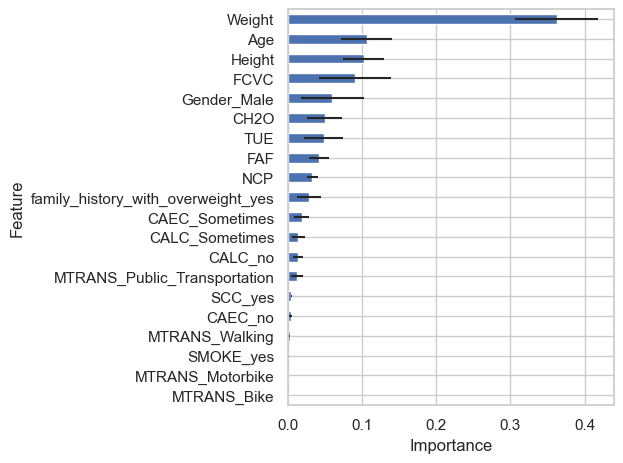

In [36]:
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)

# Create a DataFrame with feature importances and standard deviations
df = pd.DataFrame({'feature': X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')

# Plot the feature importances
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('Feature')
ax.set_xlabel('Importance')
plt.tight_layout()
plt.show()

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'predictors' and 'outcome' are your feature columns and target variable, respectively
predictors = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
              'Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes',
              'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no',
              'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
              'MTRANS_Walking']
outcome = ['NObeyesdad']

# Separate X and y variables
X = train_final[predictors]
y = train_data[outcome]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# No need to scale the data again since it's already in train_final

# Initialize the SVM model with tuned hyperparameters if needed
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')  # Example hyperparameters, you can adjust these

# Fit the model to the training data
svm_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
svm_preds = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test.values.ravel(), svm_preds)
print("SVM Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.values.ravel(), svm_preds))


SVM Accuracy: 0.8740366088631984
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.92      0.92       524
      Normal_Weight       0.85      0.82      0.83       626
     Obesity_Type_I       0.85      0.87      0.86       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.69      0.74      0.71       484
Overweight_Level_II       0.75      0.71      0.73       514

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152



In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
print(confusion_matrix(y_test,pred))

[[417 103   1   1   0   2   0]
 [104 403  17   1   0  72  29]
 [  3  15 410  21   2  33  59]
 [  0   1  32 614   1   0   9]
 [  0   1   0   1 802   0   0]
 [ 21 128  65   0   0 202  68]
 [  4  69  94  18   0  60 269]]


In [40]:
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.80      0.78       524
      Normal_Weight       0.56      0.64      0.60       626
     Obesity_Type_I       0.66      0.76      0.71       543
    Obesity_Type_II       0.94      0.93      0.94       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.55      0.42      0.47       484
Overweight_Level_II       0.62      0.52      0.57       514

           accuracy                           0.75      4152
          macro avg       0.73      0.72      0.72      4152
       weighted avg       0.75      0.75      0.75      4152



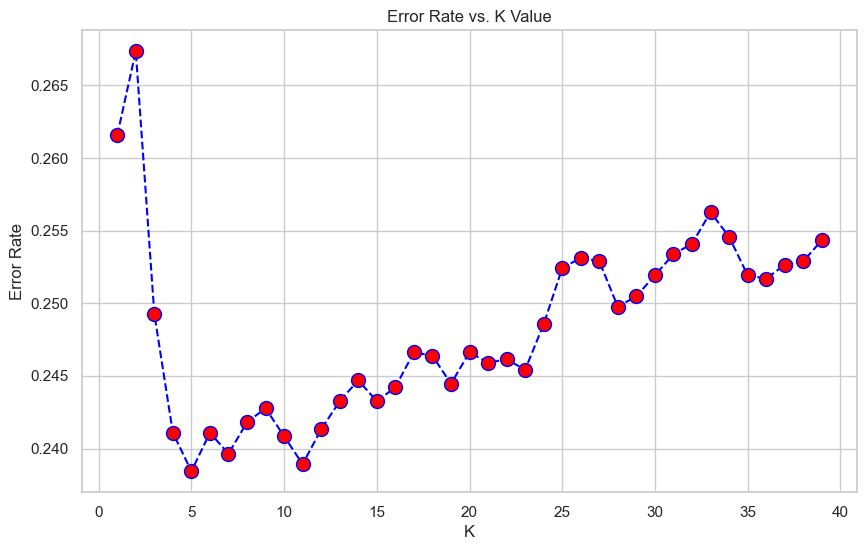

In [41]:
# Flatten y_train and y_test to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create a list to store error rates
error_rate = []

# Iterate through different values of k
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()



In [42]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[401 108   1   0   0   9   5]
 [ 75 393  16   0   0  96  46]
 [  2  10 373  23   3  58  74]
 [  1   0  38 602   2   1  13]
 [  0   0   4   1 799   0   0]
 [ 13  95  56   1   0 221  98]
 [  2  47  79  14   1  94 277]]


                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.77      0.79       524
      Normal_Weight       0.60      0.63      0.61       626
     Obesity_Type_I       0.66      0.69      0.67       543
    Obesity_Type_II       0.94      0.92      0.93       657
   Obesity_Type_III       0.99      0.99      0.99       804
 Overweight_Level_I       0.46      0.46      0.46       484
Overweight_Level_II       0.54      0.54      0.54       514

           accuracy                           0.74      4152
          macro avg       0.71      0.71      0.71      4152
       weighted avg       0.74      0.74      0.74      4152



In [43]:
# NOW WITH K=
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=11


[[437  80   2   0   0   3   2]
 [ 94 417  19   1   0  59  36]
 [  3  11 400  30   7  36  56]
 [  0   0  28 619   2   0   8]
 [  0   0   0   3 801   0   0]
 [ 17 113  69   1   0 209  75]
 [  3  44 107  25   0  70 265]]


                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.83      0.81       524
      Normal_Weight       0.63      0.67      0.65       626
     Obesity_Type_I       0.64      0.74      0.68       543
    Obesity_Type_II       0.91      0.94      0.93       657
   Obesity_Type_III       0.99      1.00      0.99       804
 Overweight_Level_I       0.55      0.43      0.49       484
Overweight_Level_II       0.60      0.52      0.55       514

           accuracy                           0.76      4152
          macro avg       0.73      0.73      0.73      4152
       weighted avg       0.75      0.76      0.75      4152



In [44]:
gb_model = GradientBoostingClassifier()

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_preds = gb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, gb_preds)
print("Gradient Boosting Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, gb_preds))

Gradient Boosting Accuracy: 0.9036608863198459
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.94       524
      Normal_Weight       0.87      0.89      0.88       626
     Obesity_Type_I       0.89      0.87      0.88       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.78      0.78      0.78       484
Overweight_Level_II       0.80      0.80      0.80       514

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best hyperparameters to initialize the model
best_gb_model = GradientBoostingClassifier(**best_params)

# Fit the model to the training data
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_preds = best_gb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, gb_preds)
print("Gradient Boosting Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, gb_preds))

Gradient Boosting Accuracy: 0.9034200385356455
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.95       524
      Normal_Weight       0.88      0.89      0.89       626
     Obesity_Type_I       0.88      0.87      0.87       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.78      0.79      0.78       484
Overweight_Level_II       0.79      0.79      0.79       514

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



In [46]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable in the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Now, fit the XGBClassifier with the encoded target variable
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)

# Transform the target variable in the test set
y_test_encoded = label_encoder.transform(y_test)

# Make predictions on the test set
xgb_preds = xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test_encoded, xgb_preds)
print("XGBoost Accuracy:", xgb_accuracy)


XGBoost Accuracy: 0.8990847784200385


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create and fit the Multinomial Naive Bayes model on the scaled data
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
nb_preds = nb_model.predict(X_test_scaled)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_preds)
print("Naive Bayes Accuracy:", nb_accuracy)


Naive Bayes Accuracy: 0.47398843930635837


In [49]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_preds = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_preds)
print("Neural Network Accuracy:", nn_accuracy)


Neural Network Accuracy: 0.8754816955684007


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

2024-02-25 22:02:29.234216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [78]:
# Adjust the architecture, hyperparameters, and other configurations as needed
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Test Accuracy: {accuracy}")


Epoch 1/100
208/208 [==============================] - 1s 2ms/step - loss: 1.3960 - accuracy: 0.4506 - val_loss: 0.9054 - val_accuracy: 0.6400
Epoch 2/100
208/208 [==============================] - 0s 2ms/step - loss: 0.8554 - accuracy: 0.6477 - val_loss: 0.6603 - val_accuracy: 0.7339
Epoch 3/100
208/208 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.7156 - val_loss: 0.5611 - val_accuracy: 0.7845
Epoch 4/100
208/208 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.7499 - val_loss: 0.4824 - val_accuracy: 0.8155
Epoch 5/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7723 - val_loss: 0.4529 - val_accuracy: 0.8320
Epoch 6/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7833 - val_loss: 0.4323 - val_accuracy: 0.8374
Epoch 7/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7973 - val_loss: 0.4142 - val_accuracy: 0.8504

Epoch 58/100
208/208 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8557 - val_loss: 0.3443 - val_accuracy: 0.8772
Epoch 59/100
208/208 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8536 - val_loss: 0.3532 - val_accuracy: 0.8769
Epoch 60/100
208/208 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8602 - val_loss: 0.3553 - val_accuracy: 0.8727
Epoch 61/100
208/208 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8586 - val_loss: 0.3446 - val_accuracy: 0.8814
Epoch 62/100
208/208 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8537 - val_loss: 0.3517 - val_accuracy: 0.8751
Epoch 63/100
208/208 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8617 - val_loss: 0.3347 - val_accuracy: 0.8793
Epoch 64/100
208/208 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8566 - val_loss: 0.3373 - val_accuracy:

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_preds)
print("Bagging Accuracy:", bagging_accuracy)

adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=1.0)
adaboost_model.fit(X_train, y_train)
adaboost_preds = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_preds)
print("AdaBoost Accuracy:", adaboost_accuracy)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.8880057803468208


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.8497109826589595


In [80]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


In [91]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

def objective(trial):
    params = {
        'objective': 'multiclass',
        'num_class': len(set(y)),
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    lgb_model = lgb.LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train)

    preds = lgb_model1.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params

# Use the best parameters to initialize the model
best_lgb_model = lgb.LGBMClassifier(**best_params)

# Fit the model to the training data
best_lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_preds = best_lgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, lgb_preds)
print("LightGBM Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, lgb_preds))


[I 2024-02-25 22:18:12,660] A new study created in memory with name: no-name-eb58db2b-11d0-4bbb-8940-ec8ce180e6f1
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-25 22:18:13,143] Trial 0 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.05302809105612406, 'max_depth': 4, 'subsample': 0.6902595503369673, 'colsample_bytree': 0.804047524823285, 'num_leaves': 38, 'min_child_samples': 10}. Best is trial 0 with value: 0.9038461538461539.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:13,676] Trial 1 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.13014334133007763, 'max_depth': 7, 'subsample': 0.889562520441495, 'colsample_bytree': 0.7936770426113482, 'num_leaves': 22, 'min_child_samples': 53}. Best is trial 1 with value: 0.9134615384615384.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:18:14,452] Trial 2 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.11079586809934618, 'max_depth': 9, 'subsample': 0.5888006289938356, 'colsample_bytree': 0.6794010809167954, 'num_leaves': 38, 'min_child_samples': 80}. Best is trial 1 with value: 0.9134615384615384.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:15,145] Trial 3 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.10223777530007135, 'max_depth': 8, 'subsample': 0.5822000498546305, 'colsample_bytree': 0.9424855473590864, 'num_leaves': 34, 'min_child_samples': 21}. Best is trial 1 with value: 0.9134615384615384.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:18:16,494] Trial 4 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.06706103277283441, 'max_depth': 11, 'subsample': 0.6941865595376264, 'colsample_bytree': 0.7344516571756357, 'num_leaves': 82, 'min_child_samples': 48}. Best is trial 1 with value: 0.9134615384615384.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further s

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-25 22:18:17,035] Trial 5 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.136191023972472, 'max_depth': 5, 'subsample': 0.7040192902683219, 'colsample_bytree': 0.8289107172214718, 'num_leaves': 97, 'min_child_samples': 40}. Best is trial 1 with value: 0.9134615384615384.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-25 22:18:17,818] Trial 6 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.18637626765762408, 'max_depth': 6, 'subsample': 0.728226502412481, 'colsample_bytree': 0.7166467730125882, 'num_leaves': 95, 'min_child_samples': 21}. Best is trial 1 with value: 0.9134615384615384.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-02-25 22:18:18,650] Trial 7 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.19244284537416304, 'max_depth': 14, 'subsample': 0.8920285065071376, 'colsample_bytree': 0.8207378102043554, 'num_leaves': 40, 'min_child_samples': 37}. Best is trial 1 with value: 0.9134615384615384.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170


[I 2024-02-25 22:18:19,248] Trial 8 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.10574471849219395, 'max_depth': 7, 'subsample': 0.9709496535836334, 'colsample_bytree': 0.9015527462279317, 'num_leaves': 26, 'min_child_samples': 26}. Best is trial 1 with value: 0.9134615384615384.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-25 22:18:20,344] Trial 9 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.16307998810678176, 'max_depth': 9, 'subsample': 0.5451139458460577, 'colsample_bytree': 0.7705582358108882, 'num_leaves': 70, 'min_child_samples': 13}. Best is trial 1 with value: 0.9134615384615384.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-02-25 22:18:20,761] Trial 10 finished with value: 0.8798076923076923 and parameters: {'learning_rate': 0.013827943483543895, 'max_depth': 12, 'subsample': 0.8537306176871567, 'colsample_bytree': 0.5545286163856196, 'num_leaves': 10, 'min_child_samples': 72}. Best is trial 1 with value: 0.9134615384615384.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y w

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:22,050] Trial 11 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.052580606651298836, 'max_depth': 12, 'subsample': 0.8485105743790227, 'colsample_bytree': 0.6131625289386848, 'num_leaves': 67, 'min_child_samples': 60}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:23,245] Trial 12 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.058707106707874615, 'max_depth': 15, 'subsample': 0.8466012005172143, 'colsample_bytree': 0.5976573600837014, 'num_leaves': 60, 'min_child_samples': 64}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:24,343] Trial 13 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.04289702390692321, 'max_depth': 15, 'subsample': 0.8118339986958251, 'colsample_bytree': 0.587598815388994, 'num_leaves': 61, 'min_child_samples': 99}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:25,363] Trial 14 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.07223051621068033, 'max_depth': 12, 'subsample': 0.9586815149375955, 'colsample_bytree': 0.6433558181694976, 'num_leaves': 53, 'min_child_samples': 66}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-02-25 22:18:26,504] Trial 15 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.020130271752877252, 'max_depth': 14, 'subsample': 0.7897867817029881, 'colsample_bytree': 0.5032623595167426, 'num_leaves': 70, 'min_child_samples': 62}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:18:27,544] Trial 16 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.0827794251773815, 'max_depth': 11, 'subsample': 0.7881068721326318, 'colsample_bytree': 0.6115771275379809, 'num_leaves': 54, 'min_child_samples': 84}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:28,843] Trial 17 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.03841003177914799, 'max_depth': 15, 'subsample': 0.910384903427145, 'colsample_bytree': 0.5026422046990474, 'num_leaves': 84, 'min_child_samples': 58}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:18:30,088] Trial 18 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.08637368581260571, 'max_depth': 13, 'subsample': 0.8347975296910591, 'colsample_bytree': 0.6691091313626426, 'num_leaves': 65, 'min_child_samples': 91}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:31,016] Trial 19 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.053361993444920576, 'max_depth': 11, 'subsample': 0.7542160243530521, 'colsample_bytree': 0.5651341002498329, 'num_leaves': 50, 'min_child_samples': 72}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:32,416] Trial 20 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.026471710121103734, 'max_depth': 13, 'subsample': 0.6301682236362864, 'colsample_bytree': 0.6202394053769427, 'num_leaves': 80, 'min_child_samples': 46}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:33,794] Trial 21 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.035655397303729686, 'max_depth': 13, 'subsample': 0.6354143365531784, 'colsample_bytree': 0.6281702456045182, 'num_leaves': 79, 'min_child_samples': 43}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:35,051] Trial 22 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.024266743976718755, 'max_depth': 13, 'subsample': 0.6500881916994723, 'colsample_bytree': 0.5422658080233785, 'num_leaves': 76, 'min_child_samples': 53}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:36,322] Trial 23 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.05931410684956608, 'max_depth': 15, 'subsample': 0.502791079372297, 'colsample_bytree': 0.6937776204075449, 'num_leaves': 60, 'min_child_samples': 32}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:18:37,938] Trial 24 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.010690390852714345, 'max_depth': 10, 'subsample': 0.928459092522415, 'colsample_bytree': 0.6030216664376573, 'num_leaves': 90, 'min_child_samples': 67}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:39,262] Trial 25 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.028825076573590964, 'max_depth': 14, 'subsample': 0.8729982412895424, 'colsample_bytree': 0.6517155107636723, 'num_leaves': 72, 'min_child_samples': 47}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:18:40,648] Trial 26 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.07616391636053704, 'max_depth': 12, 'subsample': 0.7554976625251791, 'colsample_bytree': 0.5390347594409751, 'num_leaves': 89, 'min_child_samples': 58}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:18:41,795] Trial 27 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.09203971603189466, 'max_depth': 14, 'subsample': 0.826170815079402, 'colsample_bytree': 0.5853860467160773, 'num_leaves': 64, 'min_child_samples': 77}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 19
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-02-25 22:18:42,718] Trial 28 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.0476806733916296, 'max_depth': 10, 'subsample': 0.9351080297957308, 'colsample_bytree': 0.7056123770857046, 'num_leaves': 47, 'min_child_samples': 33}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y wa

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:18:43,076] Trial 29 finished with value: 0.8990384615384616 and parameters: {'learning_rate': 0.060162423913824245, 'max_depth': 3, 'subsample': 0.6522288778197389, 'colsample_bytree': 0.6293931346777679, 'num_leaves': 45, 'min_child_samples': 58}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-02-25 22:18:44,372] Trial 30 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.03318899854121095, 'max_depth': 13, 'subsample': 0.8572148849038179, 'colsample_bytree': 0.7594536465712155, 'num_leaves': 74, 'min_child_samples': 49}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y w

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:45,789] Trial 31 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.04284820773649867, 'max_depth': 13, 'subsample': 0.649920594514493, 'colsample_bytree': 0.6134994577422457, 'num_leaves': 80, 'min_child_samples': 41}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:47,345] Trial 32 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.02848842795490643, 'max_depth': 15, 'subsample': 0.6052683667545723, 'colsample_bytree': 0.6570796506016349, 'num_leaves': 89, 'min_child_samples': 44}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:48,445] Trial 33 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.05388440561339725, 'max_depth': 12, 'subsample': 0.6137911034040138, 'colsample_bytree': 0.5801394625549157, 'num_leaves': 58, 'min_child_samples': 53}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:49,896] Trial 34 finished with value: 0.8990384615384616 and parameters: {'learning_rate': 0.12392628411197698, 'max_depth': 13, 'subsample': 0.6689426079492093, 'colsample_bytree': 0.6253122506601825, 'num_leaves': 79, 'min_child_samples': 6}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:18:51,266] Trial 35 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.06744279252925929, 'max_depth': 14, 'subsample': 0.5336987506661011, 'colsample_bytree': 0.6859492388397885, 'num_leaves': 67, 'min_child_samples': 66}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:52,734] Trial 36 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.03532827104816357, 'max_depth': 10, 'subsample': 0.7313022853599574, 'colsample_bytree': 0.5369820225315683, 'num_leaves': 83, 'min_child_samples': 51}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 19
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:54,081] Trial 37 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.019721873583887717, 'max_depth': 11, 'subsample': 0.7785223320845687, 'colsample_bytree': 0.726586399696394, 'num_leaves': 76, 'min_child_samples': 36}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:18:55,321] Trial 38 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.11924024946160762, 'max_depth': 9, 'subsample': 0.7069119082805311, 'colsample_bytree': 0.8713277446637151, 'num_leaves': 67, 'min_child_samples': 26}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-02-25 22:18:56,807] Trial 39 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.06029443038969788, 'max_depth': 14, 'subsample': 0.5676585921885389, 'colsample_bytree': 0.6703987082090322, 'num_leaves': 85, 'min_child_samples': 44}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:57,548] Trial 40 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.14267239910977544, 'max_depth': 12, 'subsample': 0.9940099679473395, 'colsample_bytree': 0.9546715887371835, 'num_leaves': 33, 'min_child_samples': 73}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:18:58,899] Trial 41 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.031843917317213755, 'max_depth': 13, 'subsample': 0.8504915036568227, 'colsample_bytree': 0.749943895529799, 'num_leaves': 74, 'min_child_samples': 49}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:00,456] Trial 42 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.04478044947113985, 'max_depth': 13, 'subsample': 0.8673254731597658, 'colsample_bytree': 0.7880022825237405, 'num_leaves': 98, 'min_child_samples': 56}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:01,711] Trial 43 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.09737743960562274, 'max_depth': 15, 'subsample': 0.8890471686537902, 'colsample_bytree': 0.8181141745148481, 'num_leaves': 76, 'min_child_samples': 62}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:03,207] Trial 44 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.03854022738514754, 'max_depth': 12, 'subsample': 0.6221278372408563, 'colsample_bytree': 0.8490380231883197, 'num_leaves': 93, 'min_child_samples': 45}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-25 22:19:04,274] Trial 45 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.01784557616502234, 'max_depth': 7, 'subsample': 0.8126032406893272, 'colsample_bytree': 0.9974788559175398, 'num_leaves': 71, 'min_child_samples': 38}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:05,283] Trial 46 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.05227043626740692, 'max_depth': 11, 'subsample': 0.684035687663634, 'colsample_bytree': 0.7696366054430044, 'num_leaves': 57, 'min_child_samples': 63}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:06,571] Trial 47 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.07840568093347766, 'max_depth': 14, 'subsample': 0.896414311745402, 'colsample_bytree': 0.6367793858577189, 'num_leaves': 79, 'min_child_samples': 31}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-25 22:19:07,193] Trial 48 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.026251256085634795, 'max_depth': 5, 'subsample': 0.7739098254266824, 'colsample_bytree': 0.7515502206574252, 'num_leaves': 62, 'min_child_samples': 50}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:08,440] Trial 49 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.0696745753899038, 'max_depth': 13, 'subsample': 0.805129758316213, 'colsample_bytree': 0.5960497288875759, 'num_leaves': 68, 'min_child_samples': 42}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170


[I 2024-02-25 22:19:08,981] Trial 50 finished with value: 0.8990384615384616 and parameters: {'learning_rate': 0.011151331885600135, 'max_depth': 15, 'subsample': 0.7217057665077247, 'colsample_bytree': 0.5660094067573354, 'num_leaves': 11, 'min_child_samples': 18}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:10,202] Trial 51 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.06628208243973979, 'max_depth': 14, 'subsample': 0.5648003600158502, 'colsample_bytree': 0.6962666690736459, 'num_leaves': 64, 'min_child_samples': 64}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:11,614] Trial 52 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.03621880568564931, 'max_depth': 14, 'subsample': 0.5010115586727597, 'colsample_bytree': 0.658791443877638, 'num_leaves': 69, 'min_child_samples': 67}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:13,070] Trial 53 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.04833757179378956, 'max_depth': 13, 'subsample': 0.5234582472701073, 'colsample_bytree': 0.67769291622277, 'num_leaves': 73, 'min_child_samples': 82}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-02-25 22:19:14,317] Trial 54 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.061995410119934986, 'max_depth': 15, 'subsample': 0.537284625366814, 'colsample_bytree': 0.6213356657676905, 'num_leaves': 55, 'min_child_samples': 70}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y w

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:19:16,017] Trial 55 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.04076627572554997, 'max_depth': 14, 'subsample': 0.8492193507449322, 'colsample_bytree': 0.6851567201771729, 'num_leaves': 85, 'min_child_samples': 55}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:17,251] Trial 56 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.05266471212027861, 'max_depth': 12, 'subsample': 0.5928167986220857, 'colsample_bytree': 0.7229704328213264, 'num_leaves': 66, 'min_child_samples': 60}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:19:18,236] Trial 57 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.08547449041568383, 'max_depth': 8, 'subsample': 0.6257664679960312, 'colsample_bytree': 0.6439867529172496, 'num_leaves': 51, 'min_child_samples': 48}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001878 secon

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-02-25 22:19:19,277] Trial 58 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.02320502056682209, 'max_depth': 13, 'subsample': 0.5724503871210362, 'colsample_bytree': 0.5188565756490804, 'num_leaves': 60, 'min_child_samples': 77}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y w

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:20,465] Trial 59 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.03340309886758594, 'max_depth': 14, 'subsample': 0.922085724049311, 'colsample_bytree': 0.5769943448509784, 'num_leaves': 75, 'min_child_samples': 68}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:19:21,843] Trial 60 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.06778104308793886, 'max_depth': 15, 'subsample': 0.8303038415354329, 'colsample_bytree': 0.6027524169020251, 'num_leaves': 81, 'min_child_samples': 54}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:23,127] Trial 61 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.035759080470608454, 'max_depth': 10, 'subsample': 0.735159867146328, 'colsample_bytree': 0.5259547944999025, 'num_leaves': 84, 'min_child_samples': 50}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:24,480] Trial 62 finished with value: 0.8990384615384616 and parameters: {'learning_rate': 0.04638309581840571, 'max_depth': 11, 'subsample': 0.673764980842311, 'colsample_bytree': 0.5494023617240641, 'num_leaves': 92, 'min_child_samples': 58}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:25,660] Trial 63 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.01715627250162143, 'max_depth': 9, 'subsample': 0.7062905384626834, 'colsample_bytree': 0.5581498757047558, 'num_leaves': 78, 'min_child_samples': 51}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:26,975] Trial 64 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.030209582734643754, 'max_depth': 10, 'subsample': 0.7632509682286215, 'colsample_bytree': 0.7046701069273835, 'num_leaves': 83, 'min_child_samples': 39}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:19:28,273] Trial 65 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.07478476727963904, 'max_depth': 12, 'subsample': 0.6359019631708305, 'colsample_bytree': 0.6147080379996218, 'num_leaves': 72, 'min_child_samples': 61}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 19
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-25 22:19:29,823] Trial 66 finished with value: 0.8990384615384616 and parameters: {'learning_rate': 0.16845316545899724, 'max_depth': 13, 'subsample': 0.7380182006795998, 'colsample_bytree': 0.5952271019688643, 'num_leaves': 86, 'min_child_samples': 36}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further s

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:31,039] Trial 67 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.024049389691260296, 'max_depth': 11, 'subsample': 0.9463452259413576, 'colsample_bytree': 0.536411888366313, 'num_leaves': 69, 'min_child_samples': 87}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:32,651] Trial 68 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.0521354532486186, 'max_depth': 12, 'subsample': 0.8831663016621945, 'colsample_bytree': 0.5758589099647777, 'num_leaves': 88, 'min_child_samples': 47}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:33,976] Trial 69 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.04048367262615952, 'max_depth': 14, 'subsample': 0.8014090332118913, 'colsample_bytree': 0.6430169097374442, 'num_leaves': 63, 'min_child_samples': 76}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:35,157] Trial 70 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.05680431180597467, 'max_depth': 8, 'subsample': 0.5943916732028955, 'colsample_bytree': 0.7450007131636287, 'num_leaves': 58, 'min_child_samples': 65}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 19
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:36,627] Trial 71 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.01722991951487823, 'max_depth': 10, 'subsample': 0.7768633123028105, 'colsample_bytree': 0.7271803278212033, 'num_leaves': 77, 'min_child_samples': 35}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:38,161] Trial 72 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.03110032828596951, 'max_depth': 11, 'subsample': 0.8235911869330433, 'colsample_bytree': 0.6658604322293405, 'num_leaves': 82, 'min_child_samples': 46}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:39,617] Trial 73 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.021847024577093168, 'max_depth': 12, 'subsample': 0.8608905915987803, 'colsample_bytree': 0.7156638958345382, 'num_leaves': 73, 'min_child_samples': 28}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:40,927] Trial 74 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.013998869912560302, 'max_depth': 11, 'subsample': 0.9093278623603205, 'colsample_bytree': 0.7653462869878604, 'num_leaves': 67, 'min_child_samples': 41}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:42,494] Trial 75 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.04655864297565095, 'max_depth': 13, 'subsample': 0.8361187962454539, 'colsample_bytree': 0.6328838207157883, 'num_leaves': 76, 'min_child_samples': 43}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:44,215] Trial 76 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.03572204213306772, 'max_depth': 13, 'subsample': 0.7881232461882898, 'colsample_bytree': 0.7946048696717539, 'num_leaves': 95, 'min_child_samples': 53}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:45,665] Trial 77 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.02759251695244605, 'max_depth': 12, 'subsample': 0.8759521589330708, 'colsample_bytree': 0.7363749595422665, 'num_leaves': 81, 'min_child_samples': 57}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:46,912] Trial 78 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.043831708692800814, 'max_depth': 15, 'subsample': 0.5533387354092633, 'colsample_bytree': 0.7809669508366264, 'num_leaves': 70, 'min_child_samples': 60}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 19
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:19:48,193] Trial 79 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.06407201357571524, 'max_depth': 11, 'subsample': 0.7165509534828612, 'colsample_bytree': 0.6842761632901193, 'num_leaves': 65, 'min_child_samples': 34}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-02-25 22:19:49,733] Trial 80 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.05815373088545819, 'max_depth': 14, 'subsample': 0.5221194585975262, 'colsample_bytree': 0.6124901222449488, 'num_leaves': 78, 'min_child_samples': 74}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:51,517] Trial 81 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.040960345351092955, 'max_depth': 13, 'subsample': 0.8622331361223583, 'colsample_bytree': 0.8017618211046196, 'num_leaves': 99, 'min_child_samples': 56}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:53,219] Trial 82 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.10611164819630864, 'max_depth': 13, 'subsample': 0.8137067904604188, 'colsample_bytree': 0.8153732708385516, 'num_leaves': 99, 'min_child_samples': 69}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:54,597] Trial 83 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.05123258798799382, 'max_depth': 10, 'subsample': 0.8410223863148193, 'colsample_bytree': 0.8342403672098978, 'num_leaves': 74, 'min_child_samples': 52}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:56,242] Trial 84 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.021094509895299218, 'max_depth': 14, 'subsample': 0.9033570673383562, 'colsample_bytree': 0.7542502934753055, 'num_leaves': 95, 'min_child_samples': 38}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:19:57,697] Trial 85 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.080086935403789, 'max_depth': 12, 'subsample': 0.8670021116005374, 'colsample_bytree': 0.7077756879728502, 'num_leaves': 86, 'min_child_samples': 55}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:19:59,058] Trial 86 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.03312560760084134, 'max_depth': 12, 'subsample': 0.689485137286447, 'colsample_bytree': 0.7787347521682335, 'num_leaves': 70, 'min_child_samples': 65}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:00,275] Trial 87 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.04708162363364886, 'max_depth': 13, 'subsample': 0.8513199247065736, 'colsample_bytree': 0.6501813289108033, 'num_leaves': 61, 'min_child_samples': 45}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:01,858] Trial 88 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.0370959509985919, 'max_depth': 14, 'subsample': 0.6644731527493559, 'colsample_bytree': 0.7357596013175108, 'num_leaves': 88, 'min_child_samples': 49}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:03,570] Trial 89 finished with value: 0.9086538461538461 and parameters: {'learning_rate': 0.055882443473326146, 'max_depth': 15, 'subsample': 0.7473415408038482, 'colsample_bytree': 0.587773617052179, 'num_leaves': 91, 'min_child_samples': 60}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-02-25 22:20:04,919] Trial 90 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.026845430309622248, 'max_depth': 9, 'subsample': 0.8003373014032372, 'colsample_bytree': 0.5130599462538518, 'num_leaves': 67, 'min_child_samples': 71}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-02-25 22:20:06,168] Trial 91 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.07206848937414491, 'max_depth': 11, 'subsample': 0.6853957413152657, 'colsample_bytree': 0.7798334578754663, 'num_leaves': 57, 'min_child_samples': 63}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y w

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:07,353] Trial 92 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.05083623856320656, 'max_depth': 11, 'subsample': 0.6563010365427527, 'colsample_bytree': 0.7644575004106838, 'num_leaves': 53, 'min_child_samples': 59}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:08,357] Trial 93 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.043134609737956145, 'max_depth': 10, 'subsample': 0.7212794480969384, 'colsample_bytree': 0.5684847885706502, 'num_leaves': 46, 'min_child_samples': 63}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:09,730] Trial 94 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.09134378070864534, 'max_depth': 13, 'subsample': 0.6373977026033035, 'colsample_bytree': 0.6267433427994781, 'num_leaves': 57, 'min_child_samples': 51}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:10,752] Trial 95 finished with value: 0.9182692307692307 and parameters: {'learning_rate': 0.06398845744029094, 'max_depth': 12, 'subsample': 0.6068065504056466, 'colsample_bytree': 0.7875083155223477, 'num_leaves': 50, 'min_child_samples': 67}. Best is trial 11 with value: 0.9182692307692307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:12,040] Trial 96 finished with value: 0.9038461538461539 and parameters: {'learning_rate': 0.010117966933067298, 'max_depth': 11, 'subsample': 0.6791174436339396, 'colsample_bytree': 0.5986979028907389, 'num_leaves': 63, 'min_child_samples': 100}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:13,453] Trial 97 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.039150519533262464, 'max_depth': 14, 'subsample': 0.6971388700331125, 'colsample_bytree': 0.7617772208621103, 'num_leaves': 80, 'min_child_samples': 40}. Best is trial 11 with value: 0.9182692307692307.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-25 22:20:14,424] Trial 98 finished with value: 0.9230769230769231 and parameters: {'learning_rate': 0.030143781568829194, 'max_depth': 13, 'subsample': 0.7702176369248481, 'colsample_bytree': 0.8067120445962539, 'num_leaves': 42, 'min_child_samples': 57}. Best is trial 98 with value: 0.9230769230769231.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170


[I 2024-02-25 22:20:15,054] Trial 99 finished with value: 0.9134615384615384 and parameters: {'learning_rate': 0.016529029948679507, 'max_depth': 13, 'subsample': 0.7714850879363211, 'colsample_bytree': 0.8471823248669981, 'num_leaves': 18, 'min_child_samples': 57}. Best is trial 98 with value: 0.9230769230769231.
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.9230769230769231
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        27
      Norm

In [68]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
    }

    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)

    return accuracy

# Create an Optuna study and optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Create the final GradientBoostingClassifier with the best hyperparameters
best_gb_model1 = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model1.fit(X_train, y_train)

# Make predictions on the test set
gb_preds = best_gb_model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, gb_preds)
print("Gradient Boosting Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, gb_preds))

[I 2024-02-29 14:03:48,758] A new study created in memory with name: no-name-4006faef-97ac-4797-ad61-12046031fd66
[I 2024-02-29 14:04:47,514] Trial 0 finished with value: 0.8990384615384616 and parameters: {'n_estimators': 136, 'learning_rate': 0.0983043231062644, 'max_depth': 10, 'subsample': 0.7719415035482922, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.8990384615384616.
[I 2024-02-29 14:05:17,065] Trial 1 finished with value: 0.8942307692307693 and parameters: {'n_estimators': 181, 'learning_rate': 0.10106221783851656, 'max_depth': 10, 'subsample': 0.76562811963492, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8990384615384616.
[I 2024-02-29 14:05:43,021] Trial 2 finished with value: 0.8990384615384616 and parameters: {'n_estimators': 146, 'learning_rate': 0.09295714832400445, 'max_depth': 10, 'subsample': 0.8011756558713717, 'min_samples_split': 6, 'min_samples_leaf': 5

[I 2024-02-29 14:15:35,320] Trial 26 finished with value: 0.9182692307692307 and parameters: {'n_estimators': 189, 'learning_rate': 0.11193231421816677, 'max_depth': 3, 'subsample': 0.8678101538358653, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 20 with value: 0.9230769230769231.
[I 2024-02-29 14:16:08,616] Trial 27 finished with value: 0.9182692307692307 and parameters: {'n_estimators': 176, 'learning_rate': 0.08446149979616258, 'max_depth': 4, 'subsample': 0.9267760064128067, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 20 with value: 0.9230769230769231.
[I 2024-02-29 14:17:06,727] Trial 28 finished with value: 0.9134615384615384 and parameters: {'n_estimators': 193, 'learning_rate': 0.06797860870762967, 'max_depth': 6, 'subsample': 0.9786642751826425, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 20 with value: 0.9230769230769231.
[I 2024-02-29 14:17:35,082] Trial 29

Best Hyperparameters: {'n_estimators': 200, 'learning_rate': 0.07807356212276684, 'max_depth': 4, 'subsample': 0.8409082462452868, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None}
Gradient Boosting Accuracy: 0.9230769230769231
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        27
      Normal_Weight       0.89      0.93      0.91        27
     Obesity_Type_I       0.88      0.85      0.87        27
    Obesity_Type_II       0.96      1.00      0.98        44
   Obesity_Type_III       1.00      1.00      1.00        37
 Overweight_Level_I       0.86      0.76      0.81        25
Overweight_Level_II       0.78      0.86      0.82        21

           accuracy                           0.92       208
          macro avg       0.91      0.91      0.91       208
       weighted avg       0.92      0.92      0.92       208



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'predictors' and 'outcome' are your feature columns and target variable, respectively
predictors = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
              'Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes',
              'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no',
              'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
              'MTRANS_Walking']
outcome = 'NObeyesdad'

# Separate X and y variables
X = train_final[predictors]
y = train_data[outcome]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


In [159]:
# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('gb', gb_model), ('lgb', best_lgb_model)],
    voting='soft'  # 'soft' for probability voting, 'hard' for majority voting
)

# Fit the Voting Classifier to the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
ensemble_preds = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_preds)
print("Ensemble Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, ensemble_preds))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Ensemble Accuracy: 0.9230769230769231
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        27
      Norm

In [162]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'predictors' and 'outcome' are your feature columns and target variable, respectively
predictors = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
              'Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes',
              'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no',
              'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
              'MTRANS_Walking']
outcome = 'NObeyesdad'

# Separate X and y variables
X = train_final[predictors]
y = train_data[outcome]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Define models
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('gb', gb_model), ('rf', rf_model), ('lgb', lgb_model)],
    voting='soft'
)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated predictions
ensemble_preds_cv = cross_val_predict(voting_classifier, X_train, y_train, cv=kf, method='predict_proba')

# Train the Voting Classifier on the full training set
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
ensemble_preds_test = voting_classifier.predict(X_test)

# Evaluate performance on the Kaggle test set
accuracy_test = accuracy_score(y_test, ensemble_preds_test)
print("Ensemble Accuracy on Test Set:", accuracy_test)

# Print the classification report for the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, ensemble_preds_test))

# Kaggle submission
test_preds_kaggle = voting_classifier.predict_proba(test_final)  # Replace X_kaggle with your Kaggle test set
# Submit test_preds_kaggle to Kaggle


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2022
[LightGBM] [Info] Number of data points in the train set: 16440, number of used features: 20
[LightGBM] [Info] Start training from score -2.105071
[LightGBM] [Info] Start training from score -1.909771
[LightGBM] [Info] Start training from score -1.949994
[LightGBM] [Info] Start training from score -1.849992
[LightGBM] [Info] Start training from score -1.641579
[LightGBM] [Info] Start training from score -2.152614
[LightGBM] [Info] Start training from score -2.114602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 16440, number of used features: 20
[LightGBM] [Info] Start training from score -2.109073
[LightGBM] [Info] Start training from score -1.909360
[LightGBM] [Info] Start training from score -1.967678
[LightGBM] [Info] Start training from score -1.861665
[LightGBM] [Info] Start training from score -1.627235
[LightGBM] [Info] Start training from score -2.150522
[LightGBM] [Info] Start training from score -2.100588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 16440, number of used features: 20
[LightGBM] [Info] Start training from score -2.122700
[LightGBM] [Info] Start training from score -1.896715
[LightGBM] [Info] Start training from score -1.975103
[LightGBM] [Info] Start training from score -1.843821
[LightGBM] [Info] Start training from score -1.641893
[LightGBM] [Info] Start training from score -2.139610
[LightGBM] [Info] Start training from score -2.104073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 20
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

# TESTING

In [50]:
test_data.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [51]:
test_data1 = pd.get_dummies(test_data, prefix_sep='_', drop_first=True)
test_data1.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'numerical_features' and 'categorical_features' are already defined
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes', 'CAEC_no',
                         'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                         'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']

# Extract numerical and categorical features from train_data1
X_test_numerical = test_data1[numerical_features]
X_test_categorical = test_data1[categorical_features]

# Scale the numerical features
scaler_numerical = StandardScaler()
X_test_scaled_numerical = scaler_numerical.fit_transform(X_test_numerical)

# Convert the scaled numerical features to a DataFrame
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features)

# Concatenate numerical and categorical features
test_final = pd.concat([X_test_scaled_numerical_df, X_test_categorical], axis=1)

# Display the processed data
test_final.head()


Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0  0.508163  1.682789  1.273786  0.932524  0.350808  1.298389 -0.141769   
1 -0.509128 -1.114658 -0.818988 -0.833161 -2.462523  1.583678  0.030307   
2  0.353000 -0.626191  0.927432  1.047997  0.350808  0.965029 -1.159701   
3 -0.512705 -1.642760  0.623672 -0.833161  0.319733  1.234234 -1.046828   
4  0.353000 -0.805996  0.668336  1.047997  0.350808  1.016818 -1.159701   

        TUE  Gender_Male  family_history_with_overweight_yes  CAEC_Sometimes  \
0 -1.005016            1                                   1               1   
1 -1.005016            0                                   1               1   
2 -0.592995            0                                   1               1   
3 -1.005016            1                                   1               1   
4  0.213881            0                                   1               1   

   CAEC_no  SMOKE_yes  SCC_yes  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0        0          0        0               1        0            0   
1        0          0        0               1        0            0   
2        0          0        0               1        0            0   
3        0          0        0               1        0            0   
4        0          0        0               1        0            0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0                 0                             1               0  
1                 0                             1               0  
2                 0                             1               0  
3                 0                             1               0  
4                 0                             1               0

In [53]:
#Separate X and y variables
predictors =['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes',
       'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking']
outcome = 'NObeyesdad'
X = train_final[predictors]
y = train_data[outcome]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)



In [169]:
gb_model = GradientBoostingClassifier()

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_preds = gb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, gb_preds)
print("Gradient Boosting Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, gb_preds))

Gradient Boosting Accuracy: 0.9086538461538461
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        27
      Normal_Weight       0.85      0.85      0.85        27
     Obesity_Type_I       0.85      0.85      0.85        27
    Obesity_Type_II       0.96      1.00      0.98        44
   Obesity_Type_III       1.00      1.00      1.00        37
 Overweight_Level_I       0.78      0.72      0.75        25
Overweight_Level_II       0.82      0.86      0.84        21

           accuracy                           0.91       208
          macro avg       0.89      0.89      0.89       208
       weighted avg       0.91      0.91      0.91       208



In [ ]:
# Save the DataFrame to a CSV file for submission
#df_test_final_pred.to_csv('predicted_test_data.csv', index=False)

In [142]:
# Assuming 'test_final' is your processed test data
# Make predictions on the test set
gb_test_preds = gb_model.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds = pd.DataFrame({'Predicted_Labels': gb_test_preds})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred = pd.concat([test_data, df_test_preds], axis=1)

# Display the DataFrame with predicted labels
print(df_test_final_pred[['id', 'Predicted_Labels']])


          id     Predicted_Labels
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [143]:
df_test_final_pred

id  Gender        Age    Height      Weight  \
0      20758    Male  26.899886  1.848294  120.644178   
1      20759  Female  21.000000  1.600000   66.000000   
2      20760  Female  26.000000  1.643355  111.600553   
3      20761    Male  20.979254  1.553127  103.669116   
4      20762  Female  26.000000  1.627396  104.835346   
...      ...     ...        ...       ...         ...   
13835  34593    Male  23.327836  1.721384   78.030383   
13836  34594  Female  29.000000  1.590000   62.000000   
13837  34595  Female  22.935612  1.585547   44.376637   
13838  34596    Male  21.000000  1.620000   53.000000   
13839  34597    Male  26.490926  1.812259  120.980508   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.938616  3.000000   Sometimes   
1                                yes  yes  2.000000  1.000000   Sometimes   
2                                yes  yes  3.000000  3.000000   Sometimes   
3                                yes  yes  2.000000  2.977909   Sometimes   
4                                yes  yes  3.000000  3.000000   Sometimes   
...                              ...  ...       ...       ...         ...   
13835                            yes   no  2.813234  3.000000   Sometimes   
13836                             no  yes  3.000000  3.000000   Sometimes   
13837                             no  yes  3.000000  2.273740  Frequently   
13838                            yes  yes  2.000000  3.000000   Sometimes   
13839                            yes  yes  2.744994  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.825629  no  0.855400  0.000000  Sometimes   
1        no  3.000000  no  1.000000  0.000000  Sometimes   
2        no  2.621877  no  0.000000  0.250502  Sometimes   
3        no  2.786417  no  0.094851  0.000000  Sometimes   
4        no  2.653531  no  0.000000  0.741069  Sometimes   
...     ...       ...  ..       ...       ...        ...   
13835    no  1.000000  no  0.807076  0.778632  Sometimes   
13836    no  2.000000  no  0.000000  0.000000  Sometimes   
13837    no  2.000000  no  1.949840  1.000000  Sometimes   
13838    no  2.000000  no  3.000000  2.000000         no   
13839    no  2.205977  no  1.304291  0.630866  Sometimes   

                      MTRANS     Predicted_Labels  
0      Public_Transportation      Obesity_Type_II  
1      Public_Transportation   Overweight_Level_I  
2      Public_Transportation     Obesity_Type_III  
3      Public_Transportation       Obesity_Type_I  
4      Public_Transportation     Obesity_Type_III  
...                      ...                  ...  
13835  Public_Transportation  Overweight_Level_II  
13836  Public_Transportation   Overweight_Level_I  
13837  Public_Transportation  Insufficient_Weight  
13838  Public_Transportation        Normal_Weight  
13839  Public_Transportation      Obesity_Type_II  

[13840 rows x 18 columns]

In [144]:
df_test_final_pred = df_test_final_pred[['id', 'Predicted_Labels']]


In [145]:
df_test_final_pred

id     Predicted_Labels
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]

In [146]:
# Assuming df_test_final_pred is your DataFrame
df_test_final_pred = df_test_final_pred[['id', 'Predicted_Labels']]

# Rename the 'Predicted_Labels' column to 'Nobeyesdad'
df_test_final_pred = df_test_final_pred.rename(columns={'Predicted_Labels': 'NObeyesdad'})

# Save the DataFrame to a CSV file for submission
#df_test_final_pred.to_csv('predicted_test_data.csv', index=False)


In [147]:
df_test_final_pred

id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]

In [148]:
df_test_final_pred.to_csv('submission4.csv', index=None)

In [151]:
test_data.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [152]:
test_data1 = pd.get_dummies(test_data, prefix_sep='_', drop_first=True)
test_data1.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [153]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'numerical_features' and 'categorical_features' are already defined
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes', 'CAEC_no',
                         'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                         'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']

# Extract numerical and categorical features from train_data1
X_test_numerical = test_data1[numerical_features]
X_test_categorical = test_data1[categorical_features]

# Scale the numerical features
scaler_numerical = StandardScaler()
X_test_scaled_numerical = scaler_numerical.fit_transform(X_test_numerical)

# Convert the scaled numerical features to a DataFrame
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features)

# Concatenate numerical and categorical features
test_final = pd.concat([X_test_scaled_numerical_df, X_test_categorical], axis=1)

# Display the processed data
test_final.head()


Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0  0.508163  1.682789  1.273786  0.932524  0.350808  1.298389 -0.141769   
1 -0.509128 -1.114658 -0.818988 -0.833161 -2.462523  1.583678  0.030307   
2  0.353000 -0.626191  0.927432  1.047997  0.350808  0.965029 -1.159701   
3 -0.512705 -1.642760  0.623672 -0.833161  0.319733  1.234234 -1.046828   
4  0.353000 -0.805996  0.668336  1.047997  0.350808  1.016818 -1.159701   

        TUE  Gender_Male  family_history_with_overweight_yes  CAEC_Sometimes  \
0 -1.005016            1                                   1               1   
1 -1.005016            0                                   1               1   
2 -0.592995            0                                   1               1   
3 -1.005016            1                                   1               1   
4  0.213881            0                                   1               1   

   CAEC_no  SMOKE_yes  SCC_yes  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0        0          0        0               1        0            0   
1        0          0        0               1        0            0   
2        0          0        0               1        0            0   
3        0          0        0               1        0            0   
4        0          0        0               1        0            0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0                 0                             1               0  
1                 0                             1               0  
2                 0                             1               0  
3                 0                             1               0  
4                 0                             1               0

In [154]:
#Separate X and y variables
predictors =['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'CAEC_Sometimes',
       'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking']
outcome = ['NObeyesdad']
X = train_final[predictors]
y = train_data[outcome]


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [129]:
# Train LightGBM model
lgb_model = lgb.LGBMClassifier(**best_params)  # Assuming best_params is the optimized parameters
lgb_model.fit(X_train, y_train)

# Make predictions on the test set using LightGBM model
lgb_preds = lgb_model.predict(X_test)

# Calculate accuracy
accuracy_lgb = accuracy_score(y_test, lgb_preds)
print("LightGBM Accuracy with GB Predictions as Features:", accuracy_lgb)

# Print the classification report for LightGBM
print("LightGBM Classification Report:")
print(classification_report(y_test, lgb_preds))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2021
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 18
[LightGBM] [Info] Start training from score -2.108171
[LightGBM] [Info] Start training from score -1.906081
[LightGBM] [Info] Start training from score -1.964030
[LightGBM] [Info] Start training from score -1.858461
[LightGBM] [Info] Start training from score -1.634319
[LightGBM] [Info] Start training from score -2.146559
[LightGBM] [Info] Start training from score -2.106170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy with GB Predictions as Features: 0.9230769230769231
LightGBM Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00

In [130]:
# Assuming 'test_final' is your processed test data
# Make predictions on the test set
lgb_test_preds = best_lgb_model.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds_lgb = pd.DataFrame({'Predicted_Labels': lgb_test_preds})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred_lgb = pd.concat([test_data, df_test_preds_lgb], axis=1)

# Display the DataFrame with predicted labels
print(df_test_final_pred_lgb[['id', 'Predicted_Labels']])


          id     Predicted_Labels
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [131]:
df_test_final_pred_lgb = df_test_final_pred_lgb[['id', 'Predicted_Labels']]

In [132]:
df_test_final_pred_lgb = df_test_final_pred_lgb.rename(columns={'Predicted_Labels': 'NObeyesdad'})

In [133]:
df_test_final_pred_lgb

id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]

In [135]:
df_test_final_pred_lgb.to_csv('submission5.csv', index=None)

In [160]:
# Assuming 'test_final' is your processed test data
# Make predictions on the test set using the ensemble classifier
ensemble_test_preds = voting_classifier.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds_vote = pd.DataFrame({'Predicted_Labels': ensemble_test_preds})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred_vote = pd.concat([test_data, df_test_preds_vote], axis=1)

# Display the DataFrame with predicted labels
print(df_test_final_pred_vote[['id', 'Predicted_Labels']])


          id     Predicted_Labels
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [161]:
df_test_final_pred_vote = df_test_final_pred_vote[['id', 'Predicted_Labels']]
df_test_final_pred_vote = df_test_final_pred_vote.rename(columns={'Predicted_Labels': 'NObeyesdad'})
df_test_final_pred_vote
df_test_final_pred_vote.to_csv('submission7.csv', index=None) #submission6

# OPTUNA GRADIENT

In [170]:
# Assuming 'best_gb_model' is the trained GradientBoostingClassifier with the best hyperparameters

# Make predictions on the test set
gb_test_preds = best_gb_model.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds_gb = pd.DataFrame({'Predicted_Labels': gb_test_preds})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred_gb = pd.concat([test_data, df_test_preds_gb], axis=1)

# Display the DataFrame with predicted labels
print(df_test_final_pred_gb[['id', 'Predicted_Labels']])


          id     Predicted_Labels
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [171]:
df_test_final_pred_gb = df_test_final_pred_gb[['id', 'Predicted_Labels']]
df_test_final_pred_gb = df_test_final_pred_gb.rename(columns={'Predicted_Labels': 'NObeyesdad'})
df_test_final_pred_gb
df_test_final_pred_gb.to_csv('submission8.csv', index=None) #submission6

In [ ]:
rf_classifier.predict

In [178]:
# Make predictions on the test set
rf_test_preds = rf_classifier.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds_rf = pd.DataFrame({'Predicted_Labels': rf_test_preds})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred_rf = pd.concat([test_data, df_test_preds_rf], axis=1)

# Display the DataFrame with predicted labels
print(df_test_final_pred_rf[['id', 'Predicted_Labels']])


          id     Predicted_Labels
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [179]:
df_test_final_pred_rf = df_test_final_pred_rf[['id', 'Predicted_Labels']]
df_test_final_pred_rf = df_test_final_pred_rf.rename(columns={'Predicted_Labels': 'NObeyesdad'})
df_test_final_pred_rf
df_test_final_pred_rf.to_csv('submission15.csv', index=None) #submission6

In [62]:
# Assuming 'best_gb_model' is the trained GradientBoostingClassifier with the best hyperparameters

# Make predictions on the test set
gb_test_preds_1 = gb_model.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds_gb_1 = pd.DataFrame({'Predicted_Labels': gb_test_preds_1})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred_gb_1 = pd.concat([test_data, df_test_preds_gb_1], axis=1)

# Display the DataFrame with predicted labels


In [63]:

df_test_final_pred_gb_1 = df_test_final_pred_gb_1.rename(columns={'Predicted_Labels': 'NObeyesdad'})
df_test_final_pred_gb_1
#df_test_final_pred_gb_1.to_csv('submission17.csv', index=None) #submission6

id  Gender        Age    Height      Weight  \
0      20758    Male  26.899886  1.848294  120.644178   
1      20759  Female  21.000000  1.600000   66.000000   
2      20760  Female  26.000000  1.643355  111.600553   
3      20761    Male  20.979254  1.553127  103.669116   
4      20762  Female  26.000000  1.627396  104.835346   
...      ...     ...        ...       ...         ...   
13835  34593    Male  23.327836  1.721384   78.030383   
13836  34594  Female  29.000000  1.590000   62.000000   
13837  34595  Female  22.935612  1.585547   44.376637   
13838  34596    Male  21.000000  1.620000   53.000000   
13839  34597    Male  26.490926  1.812259  120.980508   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.938616  3.000000   Sometimes   
1                                yes  yes  2.000000  1.000000   Sometimes   
2                                yes  yes  3.000000  3.000000   Sometimes   
3                                yes  yes  2.000000  2.977909   Sometimes   
4                                yes  yes  3.000000  3.000000   Sometimes   
...                              ...  ...       ...       ...         ...   
13835                            yes   no  2.813234  3.000000   Sometimes   
13836                             no  yes  3.000000  3.000000   Sometimes   
13837                             no  yes  3.000000  2.273740  Frequently   
13838                            yes  yes  2.000000  3.000000   Sometimes   
13839                            yes  yes  2.744994  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.825629  no  0.855400  0.000000  Sometimes   
1        no  3.000000  no  1.000000  0.000000  Sometimes   
2        no  2.621877  no  0.000000  0.250502  Sometimes   
3        no  2.786417  no  0.094851  0.000000  Sometimes   
4        no  2.653531  no  0.000000  0.741069  Sometimes   
...     ...       ...  ..       ...       ...        ...   
13835    no  1.000000  no  0.807076  0.778632  Sometimes   
13836    no  2.000000  no  0.000000  0.000000  Sometimes   
13837    no  2.000000  no  1.949840  1.000000  Sometimes   
13838    no  2.000000  no  3.000000  2.000000         no   
13839    no  2.205977  no  1.304291  0.630866  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation      Obesity_Type_II  
1      Public_Transportation   Overweight_Level_I  
2      Public_Transportation     Obesity_Type_III  
3      Public_Transportation       Obesity_Type_I  
4      Public_Transportation     Obesity_Type_III  
...                      ...                  ...  
13835  Public_Transportation  Overweight_Level_II  
13836  Public_Transportation   Overweight_Level_I  
13837  Public_Transportation  Insufficient_Weight  
13838  Public_Transportation        Normal_Weight  
13839  Public_Transportation      Obesity_Type_II  

[13840 rows x 18 columns]

In [64]:
gb1 = df_test_final_pred_gb_1[['id', 'NObeyesdad']]
print(gb1)
#gb1.to_csv('submission20.csv', index=None)

          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [ ]:
log_test_preds_1 = logreg_model.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds_log_1 = pd.DataFrame({'Predicted_Labels': log_test_preds_1})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred_log_1 = pd.concat([test_data, df_test_preds_log_1], axis=1)

# Display the DataFrame with predicted labels
df_test_final_pred_log_1[['id', 'Predicted_Labels']]
df_test_final_pred_rf = df_test_final_pred_rf.rename(columns={'Predicted_Labels': 'NObeyesdad'})
df_test_final_pred_rf
df_test_final_pred_rf.to_csv('submission16.csv', index=None) #submission6

In [205]:
bg_test_preds_1 = bagging_model.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds_bg_1 = pd.DataFrame({'Predicted_Labels': bg_test_preds_1})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred_bg_1 = pd.concat([test_data, df_test_preds_bg_1], axis=1)
df_test_final_pred_bg_1 = df_test_final_pred_bg_1.rename(columns={'Predicted_Labels': 'NObeyesdad'})
bg1 = df_test_final_pred_bg_1[['id', 'NObeyesdad']]
print(bg1)
bg1.to_csv('submission21.csv', index=None)

          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [56]:
nn_test_preds_1 = nn_model.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds_nn_1 = pd.DataFrame({'Predicted_Labels': nn_test_preds_1})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred_nn_1 = pd.concat([test_data, df_test_preds_nn_1], axis=1)
df_test_final_pred_nn_1 = df_test_final_pred_nn_1.rename(columns={'Predicted_Labels': 'NObeyesdad'})
nn1 = df_test_final_pred_nn_1[['id', 'NObeyesdad']]
print(nn1)
nn1.to_csv('submission22.csv', index=None)

          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [61]:
log_test_preds_1 = logreg_model.predict(test_final)

# Create a DataFrame with the predicted labels
df_test_preds_log_1 = pd.DataFrame({'Predicted_Labels': log_test_preds_1})

# Assuming 'test_data1' is your original test data DataFrame
# Concatenate the predicted labels DataFrame with the original test data
df_test_final_pred_log_1 = pd.concat([test_data, df_test_preds_log_1], axis=1)
df_test_final_pred_log_1 = df_test_final_pred_log_1.rename(columns={'Predicted_Labels': 'NObeyesdad'})
log1 = df_test_final_pred_log_1[['id', 'NObeyesdad']]
print(log1)
log1.to_csv('submission23.csv', index=None)

          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594        Normal_Weight
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


Randon forest classifier gave me a best accuracy of 88.6 on final test data according to leaderboard